<a href="https://colab.research.google.com/github/poojakhannasood/COVID19-Vaccination/blob/main/COVID-Vaccination-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINE GRAPH BEFORE AND AFTER NORMALIZATION - FOR EACH CONTINENT

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 34.2 MB/s 
     |████████████████████████████████| 9.5 MB 46.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [73]:
import pandas as pd
import requests
import io
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.cm as cm
from matplotlib import dates as dts
from matplotlib import pyplot as plt
from  matplotlib import style
from matplotlib import pyplot
import seaborn as sns
import itertools
from IPython import display
from ipywidgets import interact, widgets
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import files
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import matplotlib.dates as mdates
from statsmodels.tsa.arima_model  import ARIMA
from statsmodels.tsa.stattools import acf
from pandas import DataFrame
from math import sqrt
import numpy as np
from sklearn import metrics
from pmdarima.model_selection import train_test_split as time_train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics as st

from sklearn.metrics import mean_squared_error, mean_absolute_error




%matplotlib inline

# select the default graph style
style.use('ggplot')

In [ ]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url,parse_dates=['date'],index_col=['date'])
data

iso_code continent  ... human_development_index  excess_mortality
date                           ...                                          
2020-02-24      AFG      Asia  ...                   0.511               NaN
2020-02-25      AFG      Asia  ...                   0.511               NaN
2020-02-26      AFG      Asia  ...                   0.511               NaN
2020-02-27      AFG      Asia  ...                   0.511               NaN
2020-02-28      AFG      Asia  ...                   0.511               NaN
...             ...       ...  ...                     ...               ...
2021-06-24      ZWE    Africa  ...                   0.571               NaN
2021-06-25      ZWE    Africa  ...                   0.571               NaN
2021-06-26      ZWE    Africa  ...                   0.571               NaN
2021-06-27      ZWE    Africa  ...                   0.571               NaN
2021-06-28      ZWE    Africa  ...                   0.571               NaN

[98904 rows x 59 columns]

In [ ]:
#locations = ['Russia','France', 'Turkey', 'United Kingdom', 'Italy']
#locations = ['Brazil', 'Argentina', 'Colombia', 'Pero', 'Panama']
#locations = ['United States', 'Mexico', 'Canada']
#locations = ['China', 'India', 'Iran', 'Indonesia', 'Philippines', 'Iraq', 'Israel']
#locations = ['South Africa', 'Morocco', 'Tunisia']
#locations = ['Australia', 'New Zealand', 'Fiji']
#locations = ['France', 'United Kingdom', 'Italy','Brazil', 'Argentina','United States', 'Canada','India', 'Israel','South Africa', 'Australia']
locations = ['United States']


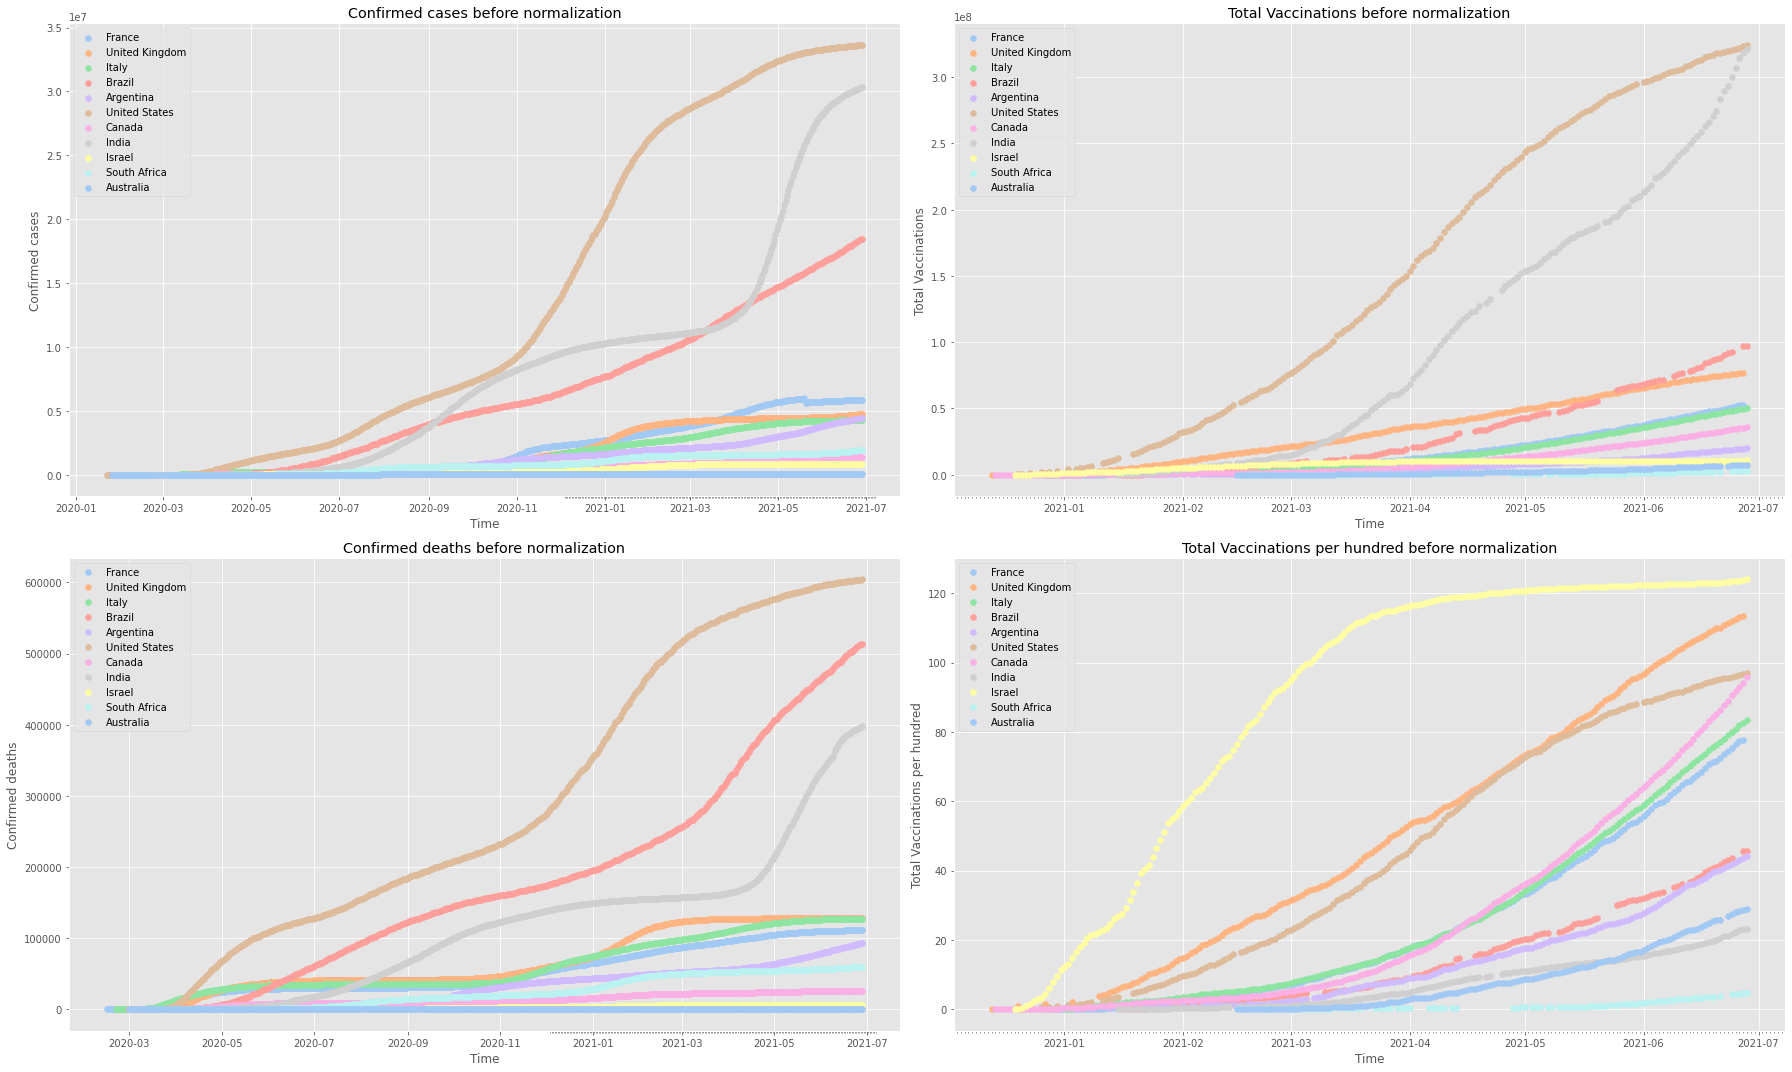

In [ ]:
# define the figure and initialise it to a size
fig = plt.figure(figsize=(25,15))

# supposing we need to do two subplots one next to the other,
# define the subplot to the left; also define some basic parameters of the subplot
ax1 = fig.add_subplot( 2,2,1)
ax1.set_title( 'Confirmed cases before normalization')
ax1.set_xlabel( 'Time')
ax1.set_ylabel( 'Confirmed cases')

# define the subplot to the right; also define some basic parameters of the subplot
ax2 = fig.add_subplot( 2, 2, 3)
ax2.set_title( 'Confirmed deaths before normalization')
ax2.set_xlabel( 'Time')
ax2.set_ylabel( 'Confirmed deaths')

# define the subplot to the right; also define some basic parameters of the subplot
ax3 = fig.add_subplot( 2, 2, 2)
ax3.set_title( 'Total Vaccinations before normalization')
ax3.set_xlabel( 'Time')
ax3.set_ylabel( 'Total Vaccinations')

# define the subplot to the right; also define some basic parameters of the subplot
ax4 = fig.add_subplot( 2, 2, 4)
ax4.set_title( 'Total Vaccinations per hundred before normalization')
ax4.set_xlabel( 'Time')
ax4.set_ylabel( 'Total Vaccinations per hundred')

#To avoid repeating colors
number_of_plots = 11
colors = sns.color_palette("pastel", number_of_plots)
ax1.set_prop_cycle('color', colors)
ax2.set_prop_cycle('color', colors)
ax3.set_prop_cycle('color', colors)
ax4.set_prop_cycle('color', colors)

# run the loop for all countries
for loc in locations:
  # filter the data for a particular country
  df = data.query( "location=='"+loc+"'")
  # get the date field (now the 'index')
  x = df.index

  # create scatter plots for the total cases (on the left) and the total deaths (on the right)
  ax1.scatter( x, df.total_cases, label=loc)
  ax2.scatter( x, df.total_deaths, label=loc)
  ax3.scatter(x,df.total_vaccinations, label=loc)
  ax4.scatter(x,df.total_vaccinations_per_hundred, label=loc)

# display a legend for both subplots
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# maximise the space the graphs will take inside the browser window
plt.tight_layout()

# activate the minor X axis ticks to represent 
days = dts.DayLocator()
ax1.xaxis.set_minor_locator(days)
ax2.xaxis.set_minor_locator(days)
ax3.xaxis.set_minor_locator(days)
ax4.xaxis.set_minor_locator(days)

# and finally display the figure
plt.show()

In [ ]:
# create a timestamp for the file
datetimeSignature = datetime.now()
# create the figure filename
graphFileName = 'confirmed_data_' + datetimeSignature.strftime('%Y_%m_%d_%H_%M_%S') + '.png'
# save the figure
fig.savefig(graphFileName,dpi=300)
# download the figure
files.download(graphFileName)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Aggregate data via average 
grouped_data = data.groupby(['location']).mean()
grouped_data.head()



total_cases  ...  excess_mortality
location                   ...                  
Afghanistan  4.027051e+04  ...               NaN
Africa       2.083666e+06  ...               NaN
Albania      4.977359e+04  ...            35.310
Algeria      6.468108e+04  ...               NaN
Andorra      5.773089e+03  ...            40.121

[5 rows x 55 columns]

In [ ]:
populations = [0]*len(locations)

for idx, loc in enumerate(locations):
  df = grouped_data.query("location=='"+loc+"'")
  populations[idx]= df.iloc[:,-16]
  #print(populations[idx])
  print("Country=='"+loc+"'", idx, populations[idx])


  #print(x, grouped_data.population)

Country=='France' 0 location
France    67564251.0
Name: population, dtype: float64
Country=='United Kingdom' 1 location
United Kingdom    67886004.0
Name: population, dtype: float64
Country=='Italy' 2 location
Italy    60461828.0
Name: population, dtype: float64
Country=='Brazil' 3 location
Brazil    212559409.0
Name: population, dtype: float64
Country=='Argentina' 4 location
Argentina    45195777.0
Name: population, dtype: float64
Country=='United States' 5 location
United States    331002647.0
Name: population, dtype: float64
Country=='Canada' 6 location
Canada    37742157.0
Name: population, dtype: float64
Country=='India' 7 location
India    1.380004e+09
Name: population, dtype: float64
Country=='Israel' 8 location
Israel    8655541.0
Name: population, dtype: float64
Country=='South Africa' 9 location
South Africa    59308690.0
Name: population, dtype: float64
Country=='Australia' 10 location
Australia    25499881.0
Name: population, dtype: float64


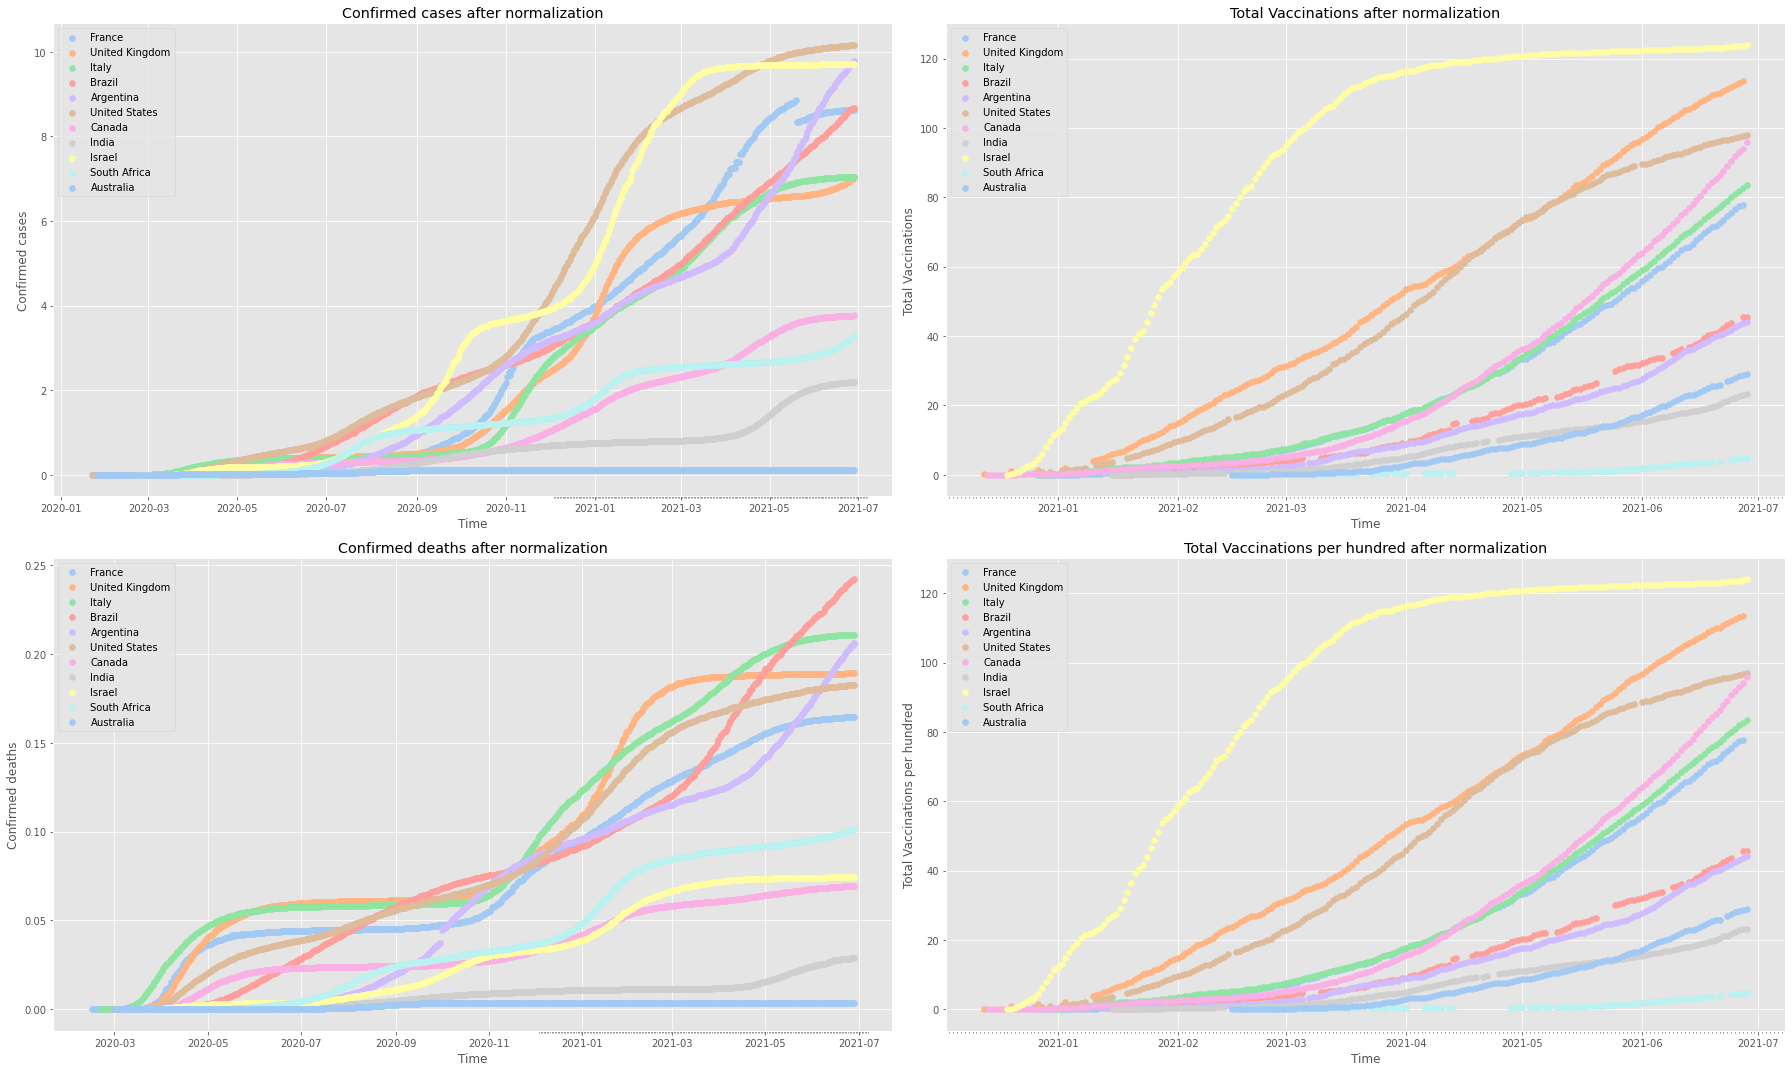

In [ ]:
# define the figure and initialise it to a size
fig = plt.figure(figsize=(25,15))

# supposing we need to do two subplots one next to the other,
# define the subplot to the left; also define some basic parameters of the subplot
ax1 = fig.add_subplot( 2, 2, 1)
ax1.set_title( 'Confirmed cases after normalization')
ax1.set_xlabel( 'Time')
ax1.set_ylabel( 'Confirmed cases')

# define the subplot to the right; also define some basic parameters of the subplot
ax2 = fig.add_subplot( 2, 2, 3)
ax2.set_title( 'Confirmed deaths after normalization')
ax2.set_xlabel( 'Time')
ax2.set_ylabel( 'Confirmed deaths')

# define the subplot to the right; also define some basic parameters of the subplot
ax3 = fig.add_subplot( 2, 2, 2)
ax3.set_title( 'Total Vaccinations after normalization')
ax3.set_xlabel( 'Time')
ax3.set_ylabel( 'Total Vaccinations')

# define the subplot to the right; also define some basic parameters of the subplot
ax4 = fig.add_subplot( 2, 2, 4)
ax4.set_title( 'Total Vaccinations per hundred after normalization')
ax4.set_xlabel( 'Time')
ax4.set_ylabel( 'Total Vaccinations per hundred')

#To avoid repeating colors
number_of_plots = 11
colors = sns.color_palette("pastel", number_of_plots)
ax1.set_prop_cycle('color', colors)
ax2.set_prop_cycle('color', colors)
ax3.set_prop_cycle('color', colors)
ax4.set_prop_cycle('color', colors)

# run the loop for all countries
for idx,loc in enumerate(locations):
  df = data.query( "location=='"+loc+"'")
  x = df.index
  ax1.scatter( x, 100*df["total_cases"]/df["population"], label=loc)
  ax2.scatter( x, 100*df["total_deaths"]/df["population"], label=loc)
  ax3.scatter( x, 100*df["total_vaccinations"]/df["population"], label=loc)
  ax4.scatter( x, df["total_vaccinations_per_hundred"], label=loc)
  

# display a legend for both subplots
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')


# maximise the space the graphs will take inside the browser window
plt.tight_layout()
# activate the minor X axis ticks to represent days
days = dts.DayLocator()
ax1.xaxis.set_minor_locator(days)
ax2.xaxis.set_minor_locator(days)
ax3.xaxis.set_minor_locator(days)
ax4.xaxis.set_minor_locator(days)

# and finally display the figure
plt.show()

In [ ]:
# create a timestamp for the file
datetimeSignature = datetime.now()
# create the figure filename
graphFileName = 'confirmed_data_' + datetimeSignature.strftime('%Y_%m_%d_%H_%M_%S') + '.png'
# save the figure
fig.savefig(graphFileName,dpi=300)
# download the figure
files.download(graphFileName)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Interactive visualization with world map

In [ ]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data1 = pd.read_csv(url)
data1.head()

iso_code continent  ... human_development_index excess_mortality
0      AFG      Asia  ...                   0.511              NaN
1      AFG      Asia  ...                   0.511              NaN
2      AFG      Asia  ...                   0.511              NaN
3      AFG      Asia  ...                   0.511              NaN
4      AFG      Asia  ...                   0.511              NaN

[5 rows x 60 columns]

In [ ]:
#Data excluding world
data1 = data1[data1.location != 'World']

#Data sort by date
data1 = data1.sort_values(by=['date'])

data1['new_date'] = pd.to_datetime(data1['date'])
data1['Year-Week'] = data1['new_date'].dt.strftime('%Y-%U')
data1.head()

iso_code      continent   location  ... excess_mortality   new_date  Year-Week
60965      MEX  North America     Mexico  ...              NaN 2020-01-01    2020-00
74601      PER  South America       Peru  ...              NaN 2020-01-01    2020-00
3748       ARG  South America  Argentina  ...              NaN 2020-01-01    2020-00
74602      PER  South America       Peru  ...              NaN 2020-01-02    2020-00
3749       ARG  South America  Argentina  ...              NaN 2020-01-02    2020-00

[5 rows x 62 columns]

In [ ]:
fig = px.choropleth(data1, locations="iso_code", 
                    color="total_vaccinations", 
                    hover_name="location", 
                    animation_frame="Year-Week", 
                    title= "Total Vaccinations",
                    color_continuous_scale=px.colors.sequential.PuRd)

fig["layout"].pop("updatemenus")
fig.show()



In [ ]:
Export as png
fig.write_image("yourfile.png") 


## Seasonality charts

In [ ]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url,parse_dates=['date'],index_col=['date'])
data.head()

iso_code continent  ... human_development_index  excess_mortality
date                           ...                                          
2020-02-24      AFG      Asia  ...                   0.511               NaN
2020-02-25      AFG      Asia  ...                   0.511               NaN
2020-02-26      AFG      Asia  ...                   0.511               NaN
2020-02-27      AFG      Asia  ...                   0.511               NaN
2020-02-28      AFG      Asia  ...                   0.511               NaN

[5 rows x 59 columns]

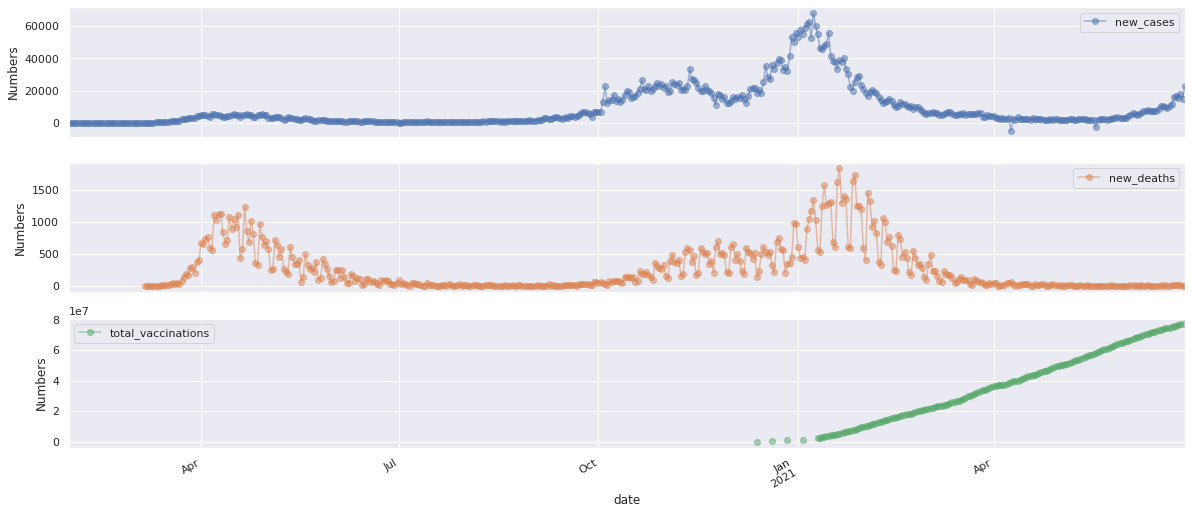

In [ ]:
data_world = data[(data['location'] == 'United Kingdom')]
parameters = ['new_cases', 'new_deaths','total_vaccinations']
axes = data_world[parameters].plot(marker='o', alpha=0.5, linestyle='-', figsize=(20,9), subplots=True)
for ax in axes:
  ax.set_ylabel('Numbers')

plt.savefig('Seasonality.png')
#sns.set(rc={'figure.figsize': (20, 15)})
#y['total_cases'].plot(linewidth=0.5)

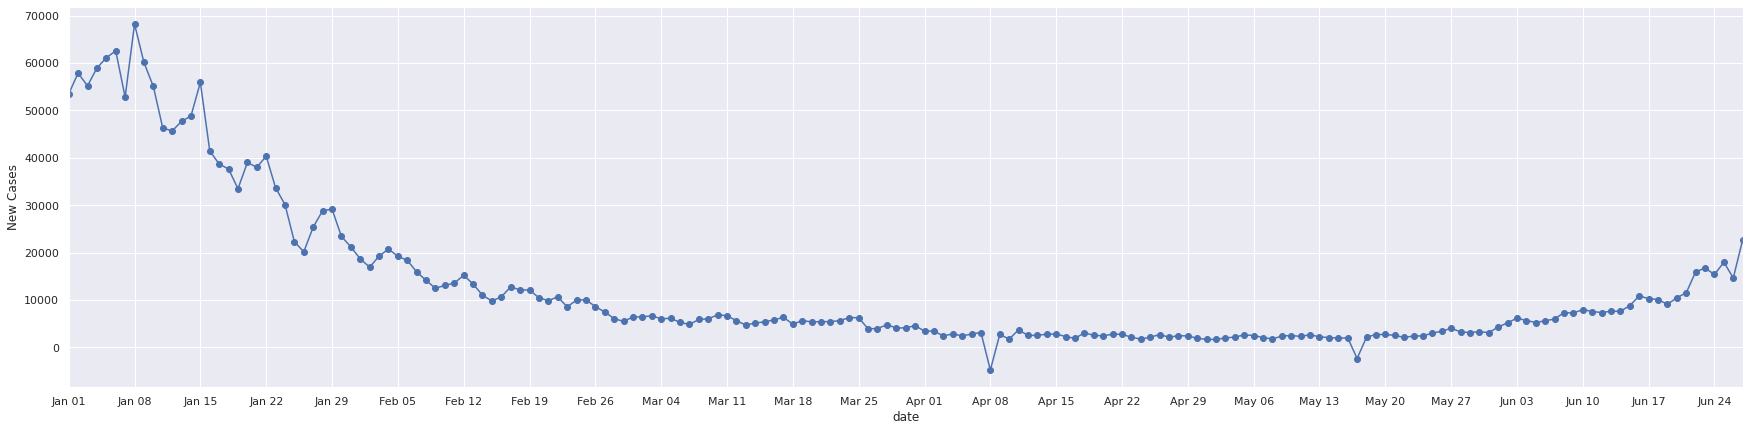

In [ ]:
fig, ax=plt.subplots()

ax1 = data_world.loc['2021-01': '2021-07', 'new_cases'].plot(marker='o', linestyle='-' , figsize=(30,7),)
ax1.set_ylabel('New Cases')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.savefig('New_cases.png')

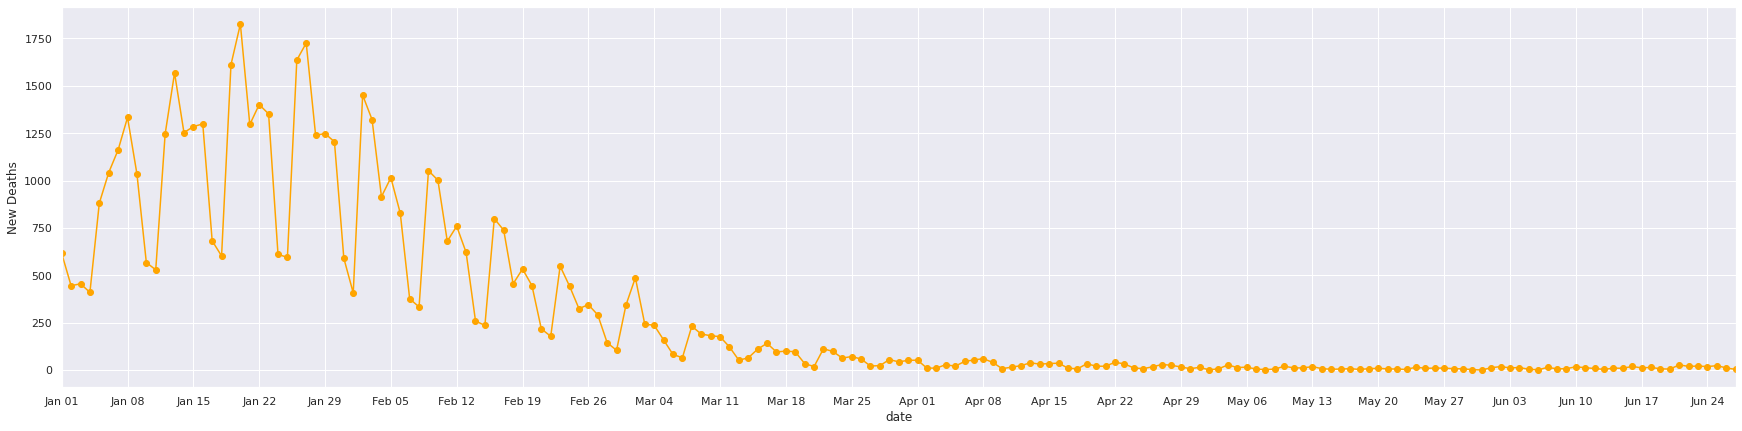

In [ ]:
fig, ax=plt.subplots()

ax2 = data_world.loc['2021-01': '2021-07', 'new_deaths'].plot(marker='o', linestyle='-' , figsize=(30,7), color='orange')
ax2.set_ylabel('New Deaths')

ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.savefig('New Deaths.png')


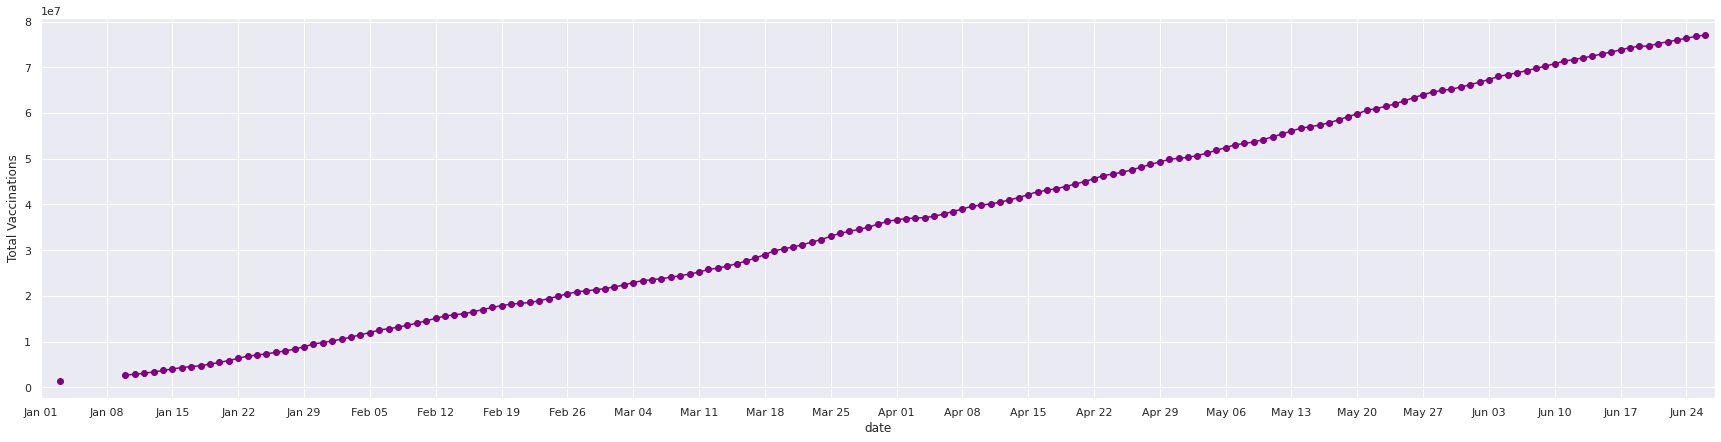

In [ ]:
fig, ax=plt.subplots()

ax3 = data_world.loc['2021-01': '2021-07', 'total_vaccinations'].plot(marker='o', linestyle='-' , figsize=(30,7),color='purple')
ax3.set_ylabel('Total Vaccinations')

ax3.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.savefig('Vaccinations.png')


In [ ]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid_data = pd.read_csv(url)
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['Month'] = pd.DatetimeIndex(covid_data['date']).month
covid_data['Year'] = pd.DatetimeIndex(covid_data['date']).year
covid_data['MonthYear'] = covid_data['date'].dt.to_period('M')
covid_data_world = covid_data[(covid_data['location'] == 'Argentina')]

(covid_data_world.groupby(['MonthYear'], as_index=False).mean().groupby('MonthYear').mean())

covid_data_world.head()

iso_code      continent   location  ... Month  Year  MonthYear
3538      ARG  South America  Argentina  ...     1  2020    2020-01
3539      ARG  South America  Argentina  ...     1  2020    2020-01
3540      ARG  South America  Argentina  ...     1  2020    2020-01
3541      ARG  South America  Argentina  ...     1  2020    2020-01
3542      ARG  South America  Argentina  ...     1  2020    2020-01

[5 rows x 63 columns]

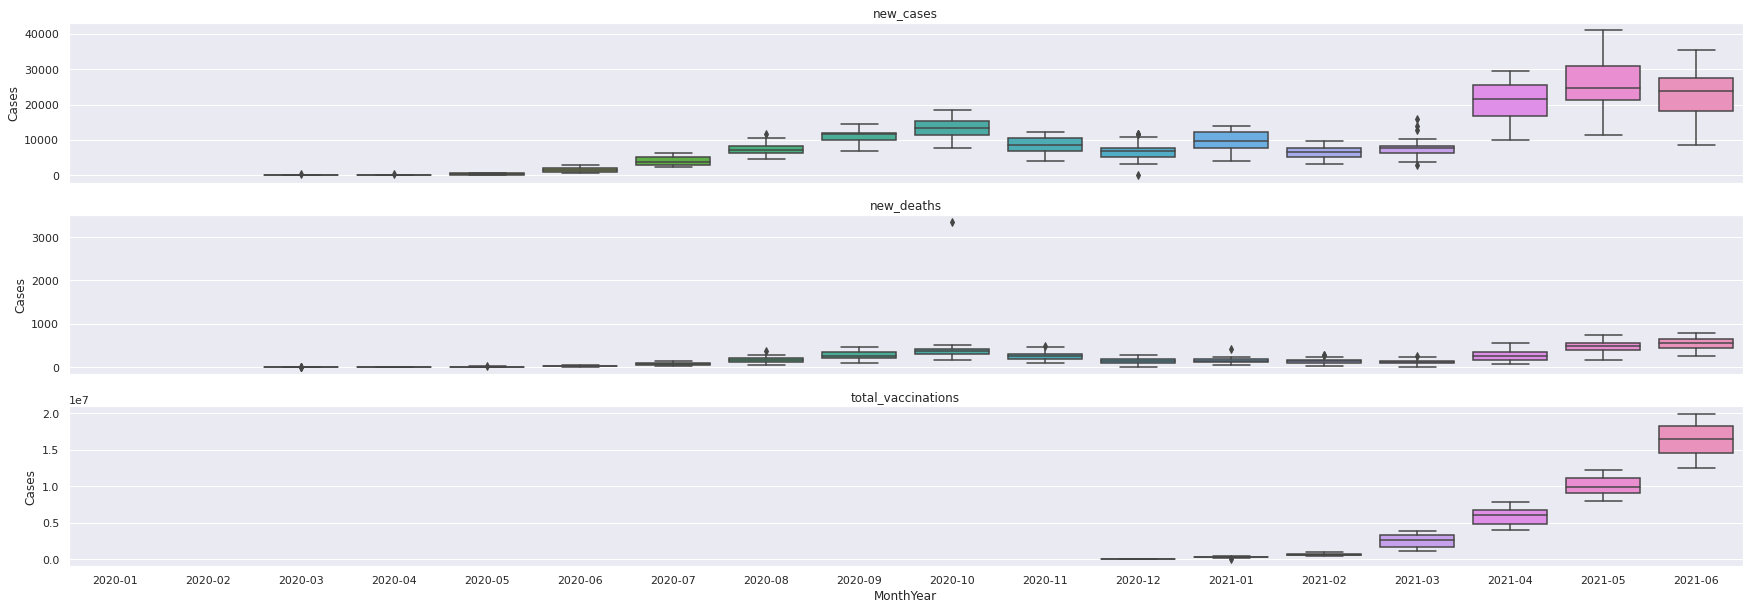

In [ ]:
#Group data by Month
fig, axes = plt.subplots(3, 1, figsize=(30, 10), sharex=True)
for name, ax in zip(['new_cases', 'new_deaths', 'total_vaccinations'], axes):
  sns.boxplot(data=covid_data_world, x='MonthYear', y=name, ax=ax)
  ax.set_ylabel('Cases')
  ax.set_title(name)

  if ax != axes[-1]:
    ax.set_xlabel('')

plt.savefig('Seasonality.png')

# ARIMA

In [127]:
#locations = ['Italy','Brazil', 'Argentina','India', 'Israel','South Africa', 'Australia']
#Import data 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
series = pd.read_csv(url, header=0, parse_dates=['date'],index_col=['date'])


#Filter by country
series = series.loc[series['location'] == 'United States']

#Drop irrelavent columns
series = series[['total_vaccinations_per_hundred']]

#Change datatype of date column to datetime
#series.date = pd.to_datetime(series.date)
#series.info()

#Replace NAN to 0
series_sorted = series.sort_values('total_vaccinations_per_hundred')
series = series_sorted.replace(np.nan,0)

#remove rows with zero values
series = series[(series.T != 0).any()]

#series.index = pd.DatetimeIndex(series.index).to_period('M')

series.tail(10)

total_vaccinations_per_hundred
date                                      
2021-07-19                          101.14
2021-07-20                          101.21
2021-07-21                          101.39
2021-07-22                          101.59
2021-07-23                          101.77
2021-07-24                          101.97
2021-07-25                          102.21
2021-07-26                          102.32
2021-07-27                          102.44
2021-07-28                          102.67

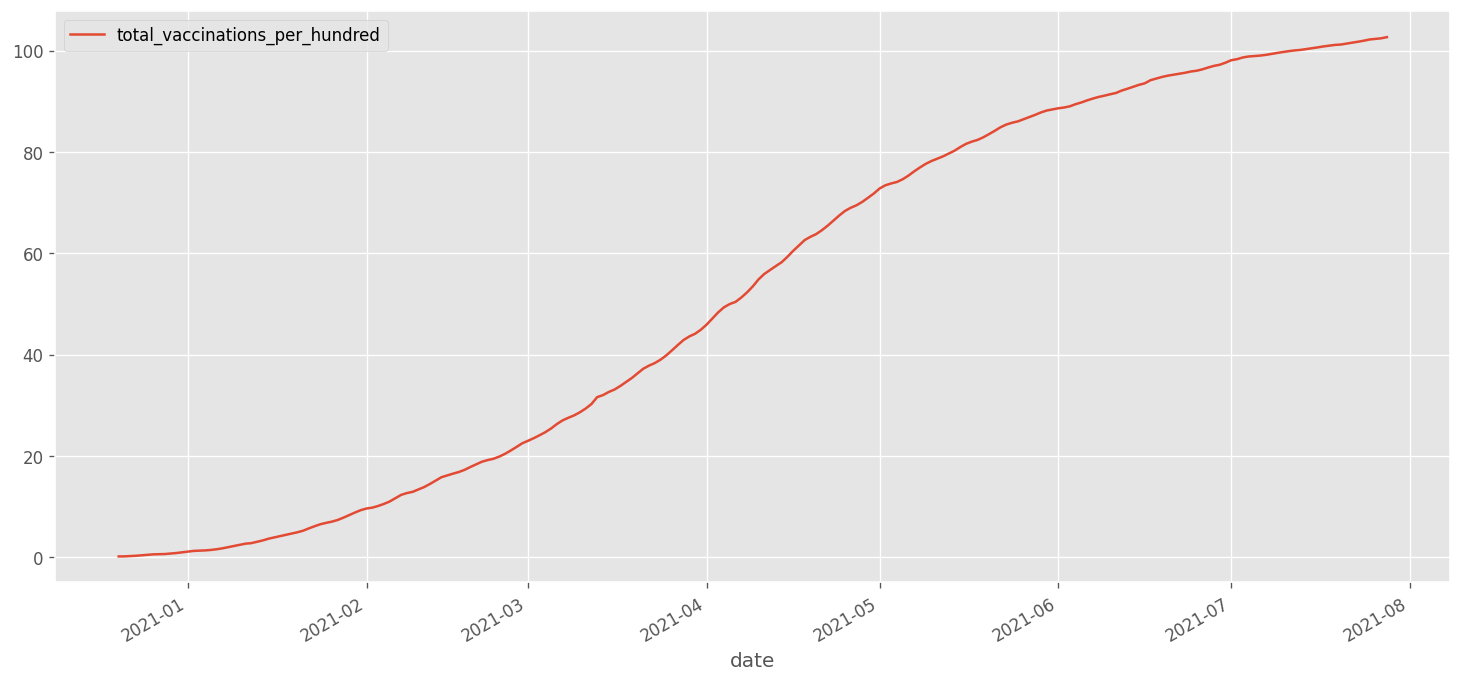

In [128]:
rcParams['figure.figsize'] = 15, 7
series.plot()

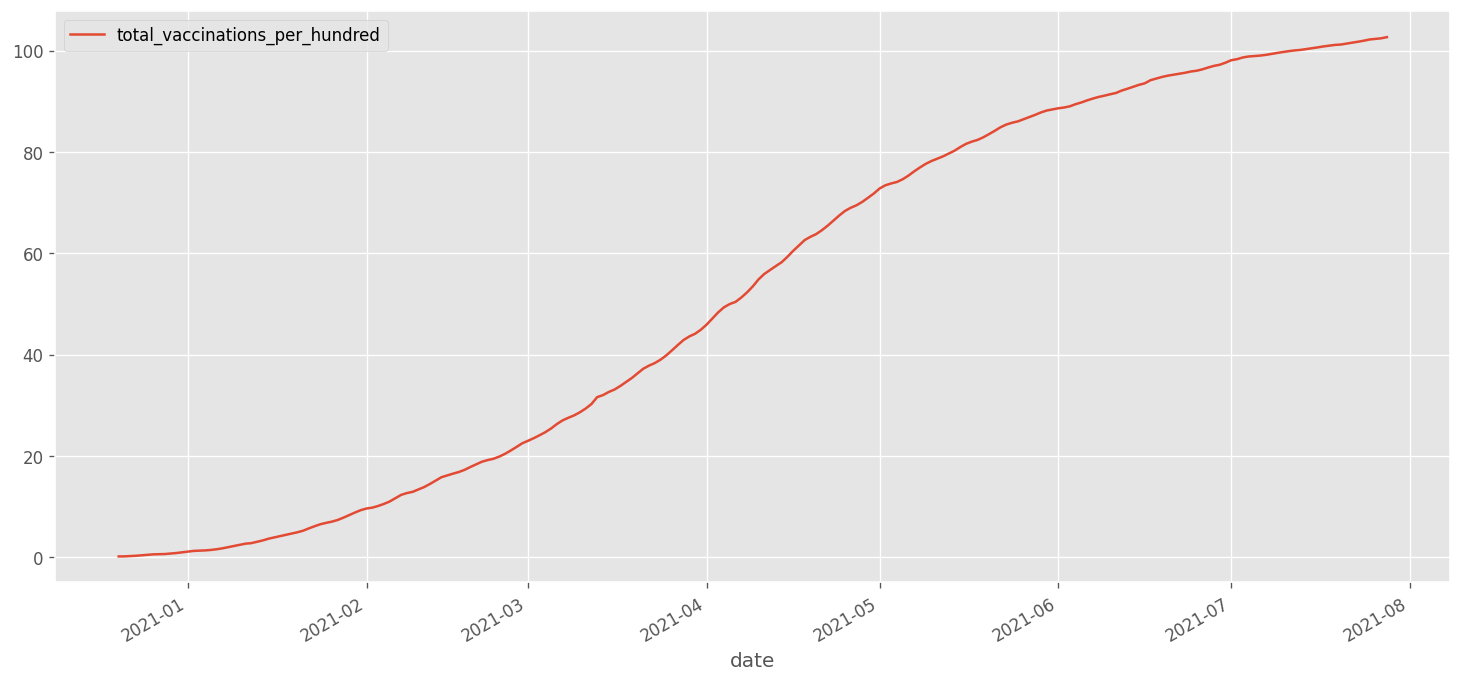

In [129]:
series.plot()
plt.show()

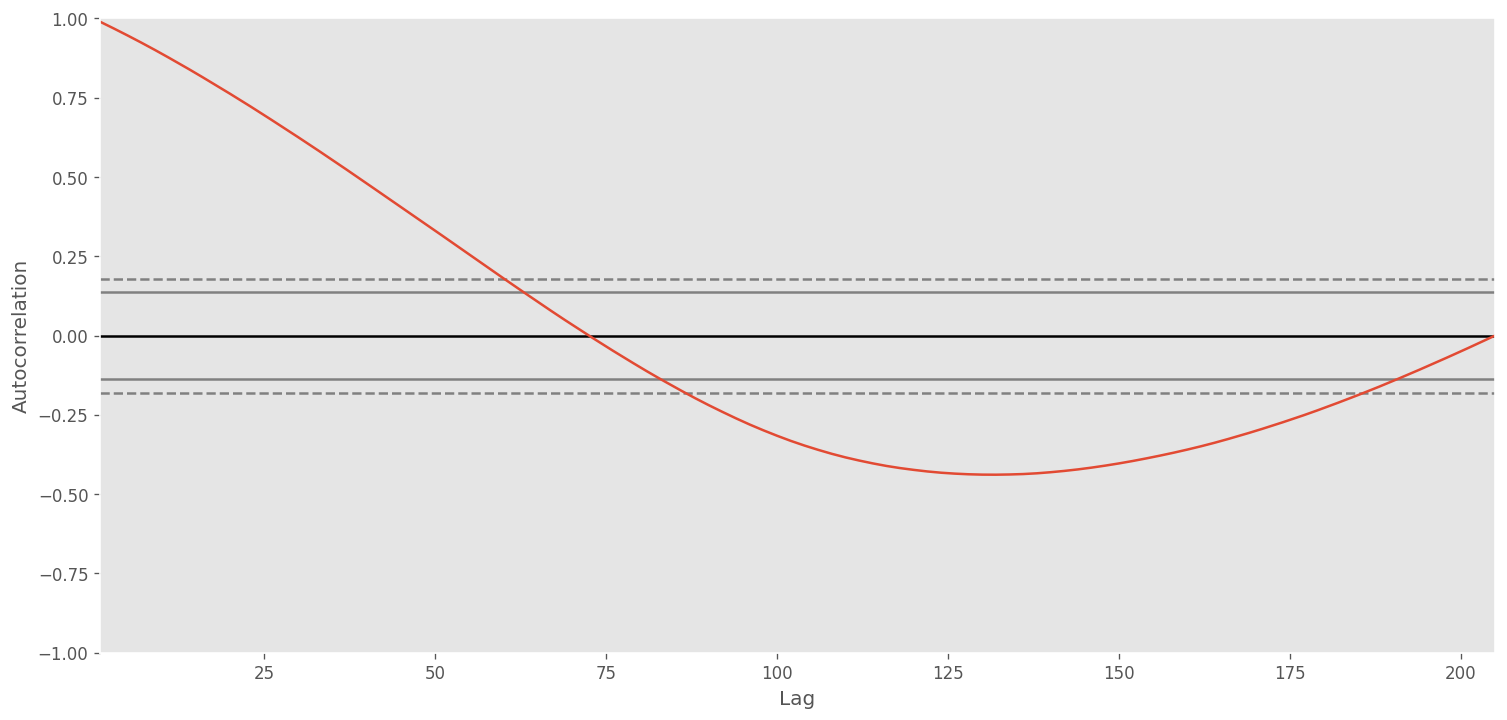

In [130]:
autocorrelation_plot(series)
plt.show()


In [131]:
result = adfuller(series.total_vaccinations_per_hundred.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.551922
p-value: 0.006750


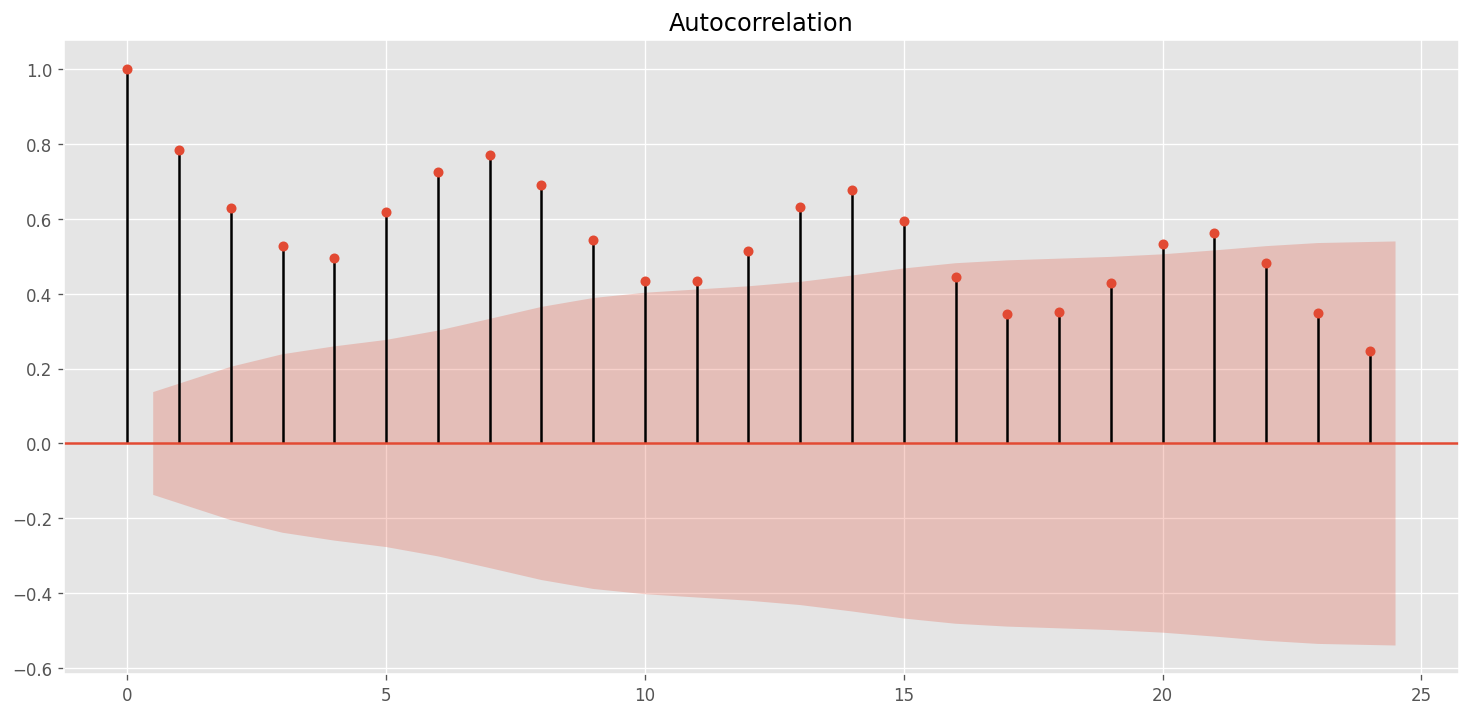

In [132]:
# Original Series
plot_acf(series.total_vaccinations_per_hundred.diff().dropna())

plt.show()

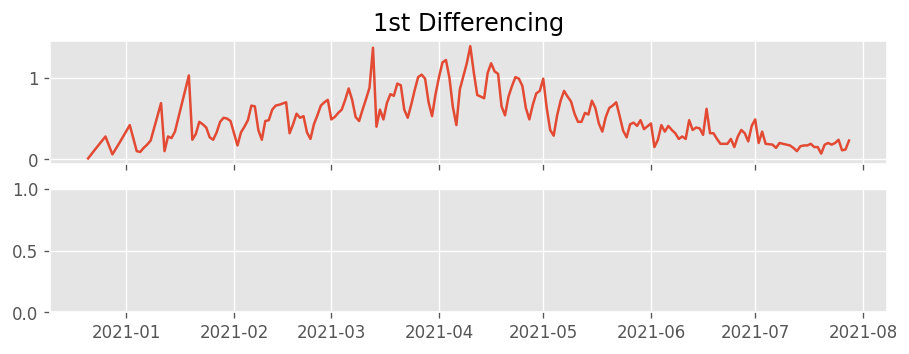

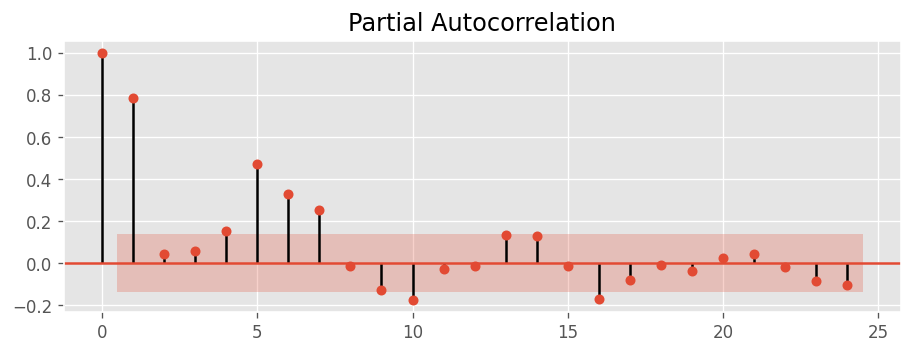

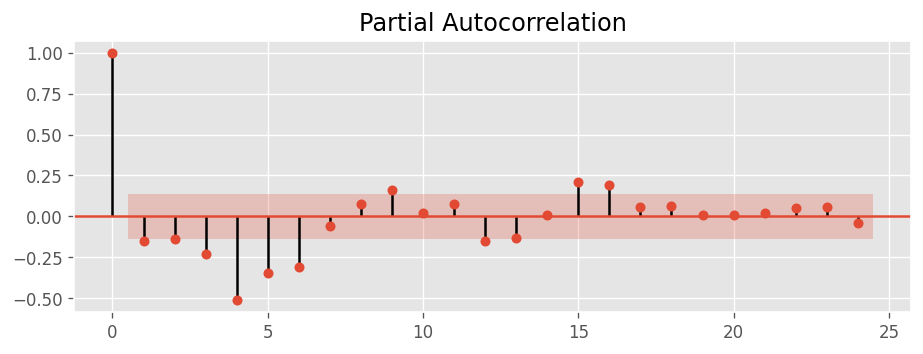

In [133]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(series.total_vaccinations_per_hundred.diff()); axes[0].set_title('1st Differencing')
#axes[1].set(ylim=(0,5))
plot_pacf(series.total_vaccinations_per_hundred.diff().dropna())
plot_pacf(series.total_vaccinations_per_hundred.diff().diff().dropna())

plt.show()

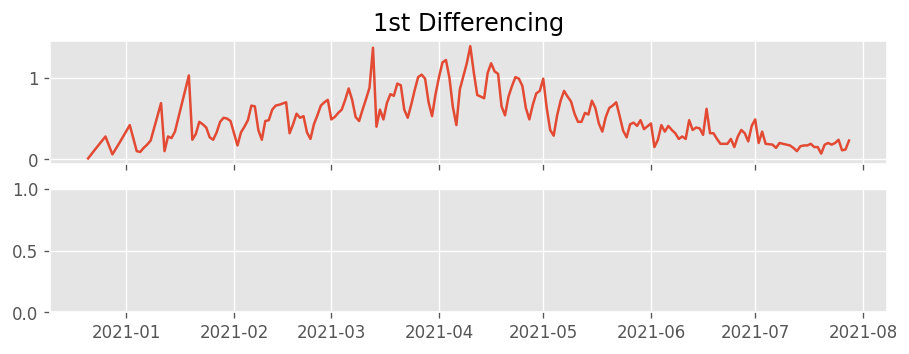

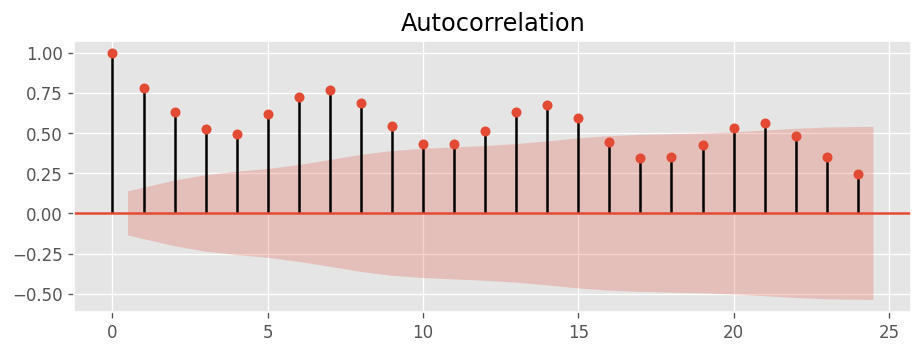

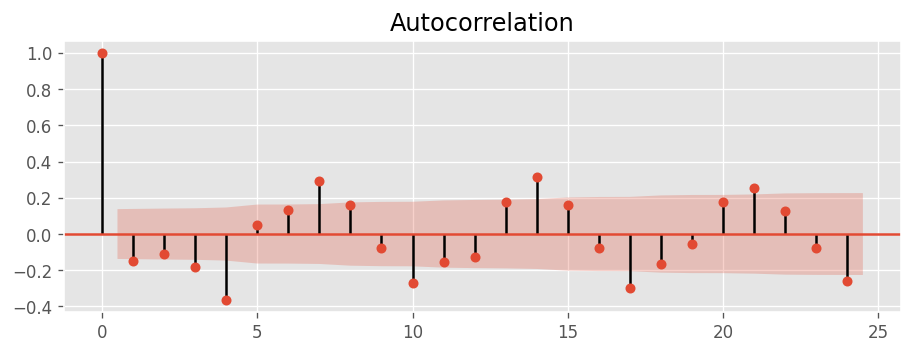

In [134]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(series.total_vaccinations_per_hundred.diff()); axes[0].set_title('1st Differencing')
#axes[1].set(ylim=(0,1.2))
plot_acf(series.total_vaccinations_per_hundred.diff().dropna())
plot_acf(series.total_vaccinations_per_hundred.diff().diff().dropna())

plt.show()

predicted=96.619992, expected=102.670000
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  172
Model:                 ARIMA(0, 2, 2)   Log Likelihood                  53.379
Method:                       css-mle   S.D. of innovations              0.177
Date:                Fri, 30 Jul 2021   AIC                            -98.757
Time:                        01:50:01   BIC                            -86.167
Sample:                             2   HQIC                           -93.649
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.003      0.186      0.852      -0.005       0.006
ma.L1.D2.y    -0.4360      0.069     -6.312      0.000      -0.571      -0.301
ma.L2.D2.y 

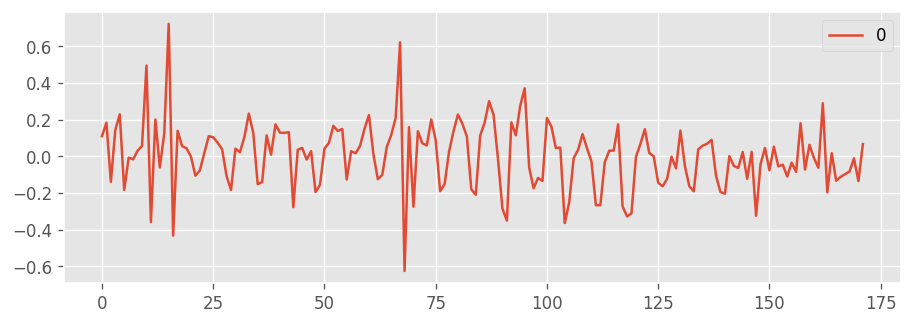

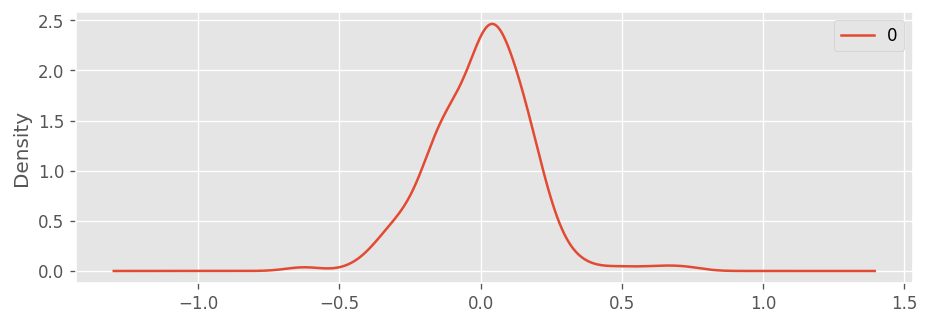

In [136]:
#series.index = series.index.to_period('M')
series.index = pd.date_range("2021-01-01", periods=205)

# Create Training and Test
X = series.values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# fit model
for t in range(len(test)):
  model = ARIMA(history, order=(0,2,2))
  model_fit = model.fit()

# walk-forward validation
output = model_fit.forecast()
yhat = output[0]
predictions.append(yhat)
obs = test[t]
history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
desc = residuals.describe()




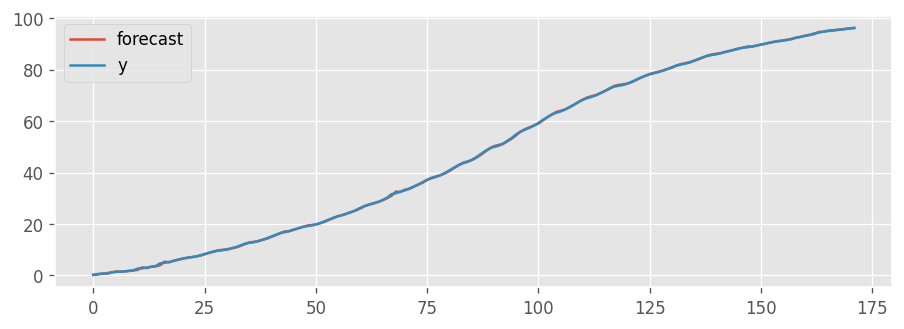

In [138]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

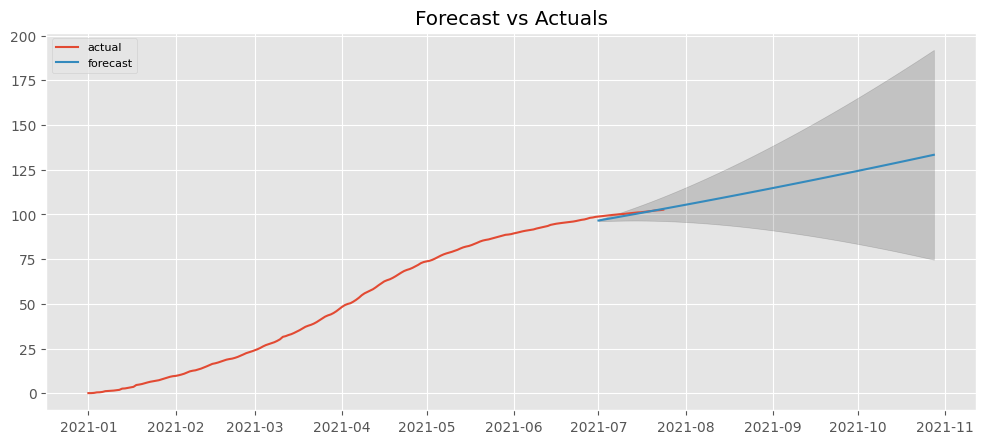

In [140]:
# Create Training and Test
train = series.total_vaccinations_per_hundred[:85]
test = series.total_vaccinations_per_hundred[85:]

model = ARIMA(train, order=(0,1,2))
fitted = model.fit()

test.index = pd.date_range("2021-07-01", periods=120)

# Forecast
fc, se, conf = model_fit.forecast(120, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# plot forecasts against actual outcomes

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(series, label='actual')

plt.plot(fc_series, label='forecast')
#plt.plot(predictions, label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#series['forecast'] = model_fit.predict(dynamic=True)
#series[['total_vaccinations', 'forecast']].plot(figsize=(12,8))

In [141]:
# Accuracy metrics
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.9666573265179993,
 'corr': 0.9591208711857673,
 'mae': 32.210457759317784,
 'mape': 0.4389638568831094,
 'me': 32.210457759317784,
 'minmax': 0.28924160859027226,
 'mpe': 0.4389638568831094,
 'rmse': 33.076190011946764}

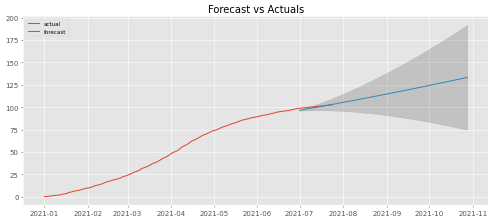

In [143]:
# Create Training and Test
train = series.total_vaccinations_per_hundred[:85]
test = series.total_vaccinations_per_hundred[85:]

test.index = pd.date_range("2021-07-01", periods = 120)

#Forecast
fc, se, conf = model_fit.forecast(120, alpha=0.05)

# Make as pandas series

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=50)
#plt.plot(test, label='training')
plt.plot(series, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

predicted=96.619992, expected=96.680000
predicted=96.991192, expected=97.000000
predicted=97.295577, expected=97.220000
predicted=97.469881, expected=97.630000
predicted=97.998457, expected=98.120000
predicted=98.501582, expected=98.320000
predicted=98.555457, expected=98.660000
predicted=99.020203, expected=98.850000
predicted=99.078554, expected=99.030000
predicted=99.291396, expected=99.170000
predicted=99.380363, expected=99.370000
predicted=99.617503, expected=99.560000
predicted=99.778993, expected=99.740000
predicted=99.957373, expected=99.910000
predicted=100.114463, expected=100.050000
predicted=100.234720, expected=100.150000
predicted=100.309308, expected=100.310000
predicted=100.499371, expected=100.480000
predicted=100.658153, expected=100.650000
predicted=100.830301, expected=100.840000
predicted=101.028645, expected=100.990000
predicted=101.153352, expected=101.140000
predicted=101.309273, expected=101.210000
predicted=101.327620, expected=101.390000
predicted=101.577451

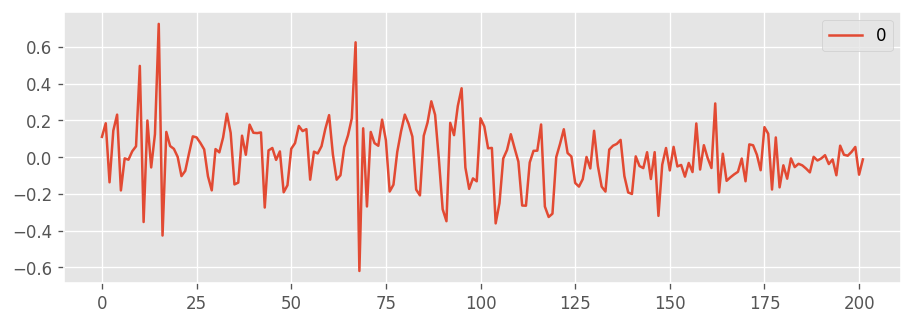

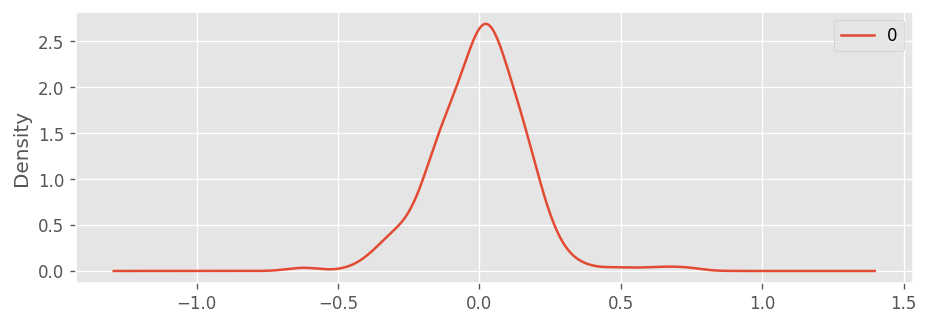

                0
count  202.000000
mean     0.002258
std      0.166796
min     -0.620358
25%     -0.099059
50%      0.012484
75%      0.106909
max      0.725194
Forecast Errors: [0.07072538670846029]
Mean Forecast Errors: 0.07072538670846029
Bias: 0.070725
MAPE: 0.001
MAE: 0.071
Test RMSE: 0.079


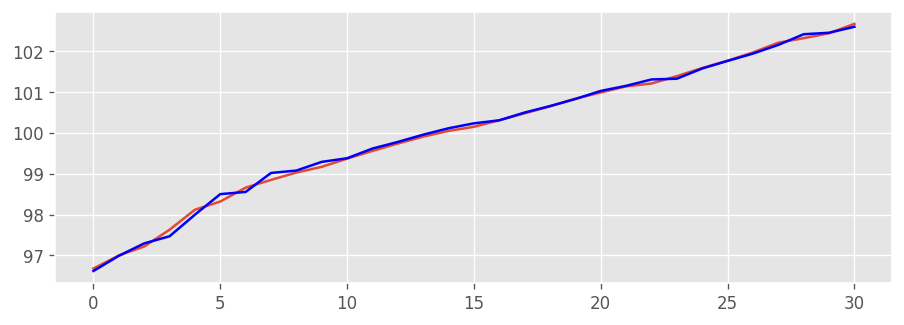

In [145]:
#series.index = series.index.to_period('M')
series.index = pd.date_range("2021-07-23", periods=205)

# split into train and test sets
X = series.values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,2,2))
	fitted = model.fit()
	output = fitted.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
print(fitted.summary())

# line plot of residuals
residuals = DataFrame(fitted.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
print(residuals.describe())



#Forcast errors
forecast_errors = [obs[i]-yhat[i] for i in range(len(obs))]
print('Forecast Errors: %s' % forecast_errors)

#Mean Forcast error
mean_forecast_error = st.mean(forecast_errors)
print('Mean Forecast Errors: %s' % mean_forecast_error)

#calculate Bias
bias = sum(forecast_errors) * 1.0/len(obs)
print('Bias: %f' % bias)

# Evaluate MAPE
mape = np.mean(np.abs(yhat - obs)/np.abs(obs))  # MAPE
print('MAPE: %.3f' % mape)

#Evaluare MAE
mae = np.mean(np.abs(yhat - obs))    # MAE
print('MAE: %.3f' % mae)

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='blue')
plt.show()

In [146]:
def mean_absolute_percentage_error(y_true, y_pred):
    '''
    Calculate the mean absolute percentage error as a metric for evaluation
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        Mean absolute percentage error 
    '''    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [147]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [148]:
timeseries_evaluation_metrics_func(yhat , obs)

Evaluation metric results: 
MSE is : 0.005002080325061252
MAE is : 0.07072538670846029
RMSE is : 0.07072538670846029
MAPE is : 0.06893361281064841
R2 is : nan



In [149]:
#4 more predictions
# walk-forward validation
predictions_four_more_arima = []
for t in range(4):
    model = ARIMA(history, order=(0,1,2)) 
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_four_more_arima.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))

predicted=103.070231
predicted=103.548780
predicted=104.048182
predicted=104.547585


In [150]:
#key for us is what are the next four quarters going to be like?
for i in range(4):
    print(predictions_four_more_arima[i])

[103.07023099]
[103.54877977]
[104.04818181]
[104.54758475]


In [151]:
#we can add those four predictions to a dataframe, and concatenate it to the original
pred_array_arima = {'date': ['2021-07-24', '2021-07-25', '2021-07-26', '2021-07-27'], 'total_vaccinations_per_hundred': [123.11,\
                                                        123.71, 124.33,124.95]}
pred_df_arima = pd.DataFrame(data=pred_array_arima)
pred_df_arima

date  total_vaccinations_per_hundred
0  2021-07-24                          123.11
1  2021-07-25                          123.71
2  2021-07-26                          124.33
3  2021-07-27                          124.95

In [152]:
series.reset_index(inplace=True)
series

index  total_vaccinations_per_hundred
0   2021-07-23                            0.17
1   2021-07-24                            0.18
2   2021-07-25                            0.30
3   2021-07-26                            0.58
4   2021-07-27                            0.64
..         ...                             ...
200 2022-02-08                          101.97
201 2022-02-09                          102.21
202 2022-02-10                          102.32
203 2022-02-11                          102.44
204 2022-02-12                          102.67

[205 rows x 2 columns]

In [153]:
combined_future_arima = pd.concat([series,pred_df_arima], axis=0, ignore_index=True)
combined_future_arima['date'] = pd.to_datetime(combined_future_arima['date'],format='%Y-%m-%d')

combined_future_arima.tail(10)

index  total_vaccinations_per_hundred       date
199 2022-02-07                          101.77        NaT
200 2022-02-08                          101.97        NaT
201 2022-02-09                          102.21        NaT
202 2022-02-10                          102.32        NaT
203 2022-02-11                          102.44        NaT
204 2022-02-12                          102.67        NaT
205        NaT                          123.11 2021-07-24
206        NaT                          123.71 2021-07-25
207        NaT                          124.33 2021-07-26
208        NaT                          124.95 2021-07-27

### **XGBOOST**

In [154]:
import warnings
warnings.filterwarnings("ignore")

In [155]:
#Import data 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
series = pd.read_csv(url, header=0, parse_dates=['date'],index_col=['date'])


#Filter by country
series = series.loc[series['location'] == 'United States']

#Drop irrelavent columns
series = series[['total_vaccinations_per_hundred']]

#Change datatype of date column to datetime
#series.date = pd.to_datetime(series.date)
#series.info()

#Replace NAN to 0
series_sorted = series.sort_values('total_vaccinations_per_hundred')
series = series_sorted.replace(np.nan,0)

#remove rows with zero values
series = series[(series.T != 0).any()]

#series.index = pd.DatetimeIndex(series.index).to_period('M')

series

total_vaccinations_per_hundred
date                                      
2020-12-20                            0.17
2020-12-21                            0.18
2020-12-23                            0.30
2020-12-26                            0.58
2020-12-28                            0.64
...                                    ...
2021-07-24                          101.97
2021-07-25                          102.21
2021-07-26                          102.32
2021-07-27                          102.44
2021-07-28                          102.67

[205 rows x 1 columns]

In [156]:
def create_features(df, target_variable):
    """
    Creates time series features from datetime index
    
    Args:
        df (float64): Values to be added to the model incl. corresponding datetime
                      , numpy array of floats
        target_variable (string): Name of the target variable within df   
    
    Returns:
        X (int): Extracted values from datetime index, dataframe
        y (int): Values of target variable, numpy array of integers
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if target_variable:
        y = df[target_variable]
        return X, y
    return X

In [157]:
def mean_absolute_percentage_error(y_true, y_pred):
    '''
    Calculate the mean absolute percentage error as a metric for evaluation
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        Mean absolute percentage error 
    '''    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [158]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    #print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [159]:
X = series['total_vaccinations_per_hundred']

# Test Size = 20%
train_series, test_series = time_train_test_split(X, test_size=int(len(series)*0.10))

train_series = pd.DataFrame(train_series)
test_series = pd.DataFrame(test_series)

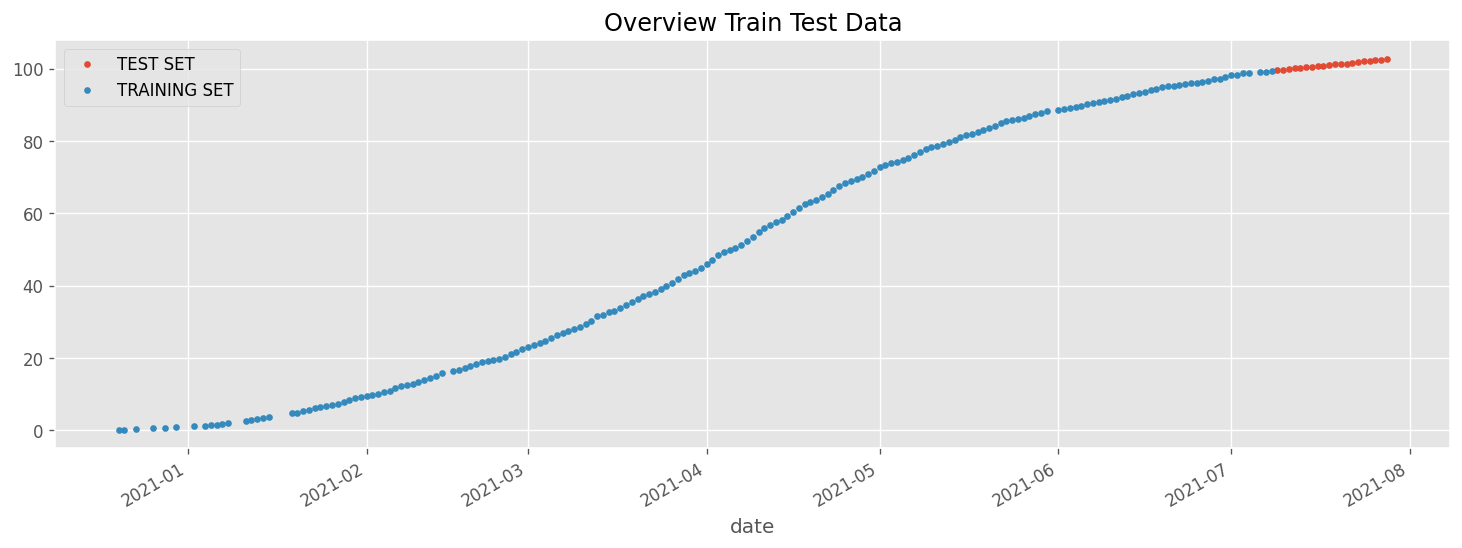

In [160]:
Overview_Train_Test_Data = test_series \
    .rename(columns={'total_vaccinations_per_hundred': 'TEST SET'}) \
    .join(train_series.rename(columns={'total_vaccinations_per_hundred': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Overview Train Test Data', style='.')

In [161]:
train_series_copy = train_series.copy()
test_series_copy = test_series.copy()

trainX, trainY = create_features(train_series_copy, target_variable='total_vaccinations_per_hundred')
testX, testY = create_features(test_series_copy, target_variable='total_vaccinations_per_hundred')

In [162]:
trainX

dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear
date                                                                          
2020-12-20          6        4     12  2020        355          20          51
2020-12-21          0        4     12  2020        356          21          52
2020-12-23          2        4     12  2020        358          23          52
2020-12-26          5        4     12  2020        361          26          52
2020-12-28          0        4     12  2020        363          28          53
...               ...      ...    ...   ...        ...         ...         ...
2021-07-03          5        3      7  2021        184           3          26
2021-07-04          6        3      7  2021        185           4          26
2021-07-06          1        3      7  2021        187           6          27
2021-07-07          2        3      7  2021        188           7          27
2021-07-08          3        3      7  2021        189           8          27

[185 rows x 7 columns]

In [163]:
testX

dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear
date                                                                          
2021-07-09          4        3      7  2021        190           9          27
2021-07-10          5        3      7  2021        191          10          27
2021-07-11          6        3      7  2021        192          11          27
2021-07-12          0        3      7  2021        193          12          28
2021-07-13          1        3      7  2021        194          13          28
2021-07-14          2        3      7  2021        195          14          28
2021-07-15          3        3      7  2021        196          15          28
2021-07-16          4        3      7  2021        197          16          28
2021-07-17          5        3      7  2021        198          17          28
2021-07-18          6        3      7  2021        199          18          28
2021-07-19          0        3      7  2021        200          19          29
2021-07-20          1        3      7  2021        201          20          29
2021-07-21          2        3      7  2021        202          21          29
2021-07-22          3        3      7  2021        203          22          29
2021-07-23          4        3      7  2021        204          23          29
2021-07-24          5        3      7  2021        205          24          29
2021-07-25          6        3      7  2021        206          25          29
2021-07-26          0        3      7  2021        207          26          30
2021-07-27          1        3      7  2021        208          27          30
2021-07-28          2        3      7  2021        209          28          30

In [164]:
xgb = XGBRegressor(objective= 'reg:squarederror', n_estimators=2000)
xgb

model=xgb.fit(trainX, trainY,
        eval_set=[(trainX, trainY), (testX, testY)],
        early_stopping_rounds=300,
        verbose=False) # Change verbose to True if you want to see it train

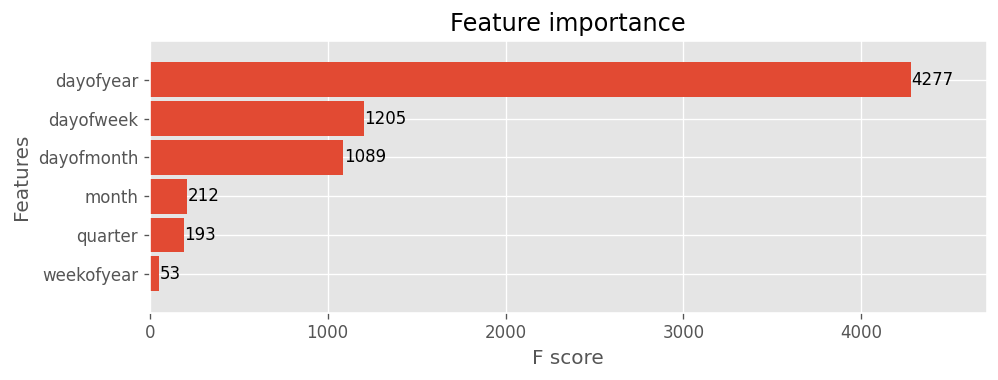

In [165]:
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

In [166]:
test_series['total_vaccinations_per_hundred_prediction'] = xgb.predict(testX)
series_all = pd.concat([test_series, train_series], sort=False)

test_series

total_vaccinations_per_hundred  total_vaccinations_per_hundred_prediction
date                                                                                 
2021-07-09                           99.56                                  99.112411
2021-07-10                           99.74                                  99.020645
2021-07-11                           99.91                                  99.064201
2021-07-12                          100.05                                  98.868637
2021-07-13                          100.15                                  98.846169
2021-07-14                          100.31                                  98.635216
2021-07-15                          100.48                                  98.695358
2021-07-16                          100.65                                  98.692673
2021-07-17                          100.84                                  98.648338
2021-07-18                          100.99                                  98.662201
2021-07-19                          101.14                                  98.637909
2021-07-20                          101.21                                  98.640427
2021-07-21                          101.39                                  98.630989
2021-07-22                          101.59                                  98.696419
2021-07-23                          101.77                                  98.641014
2021-07-24                          101.97                                  98.710869
2021-07-25                          102.21                                  98.465149
2021-07-26                          102.32                                  98.544022
2021-07-27                          102.44                                  98.713463
2021-07-28                          102.67                                  98.561913

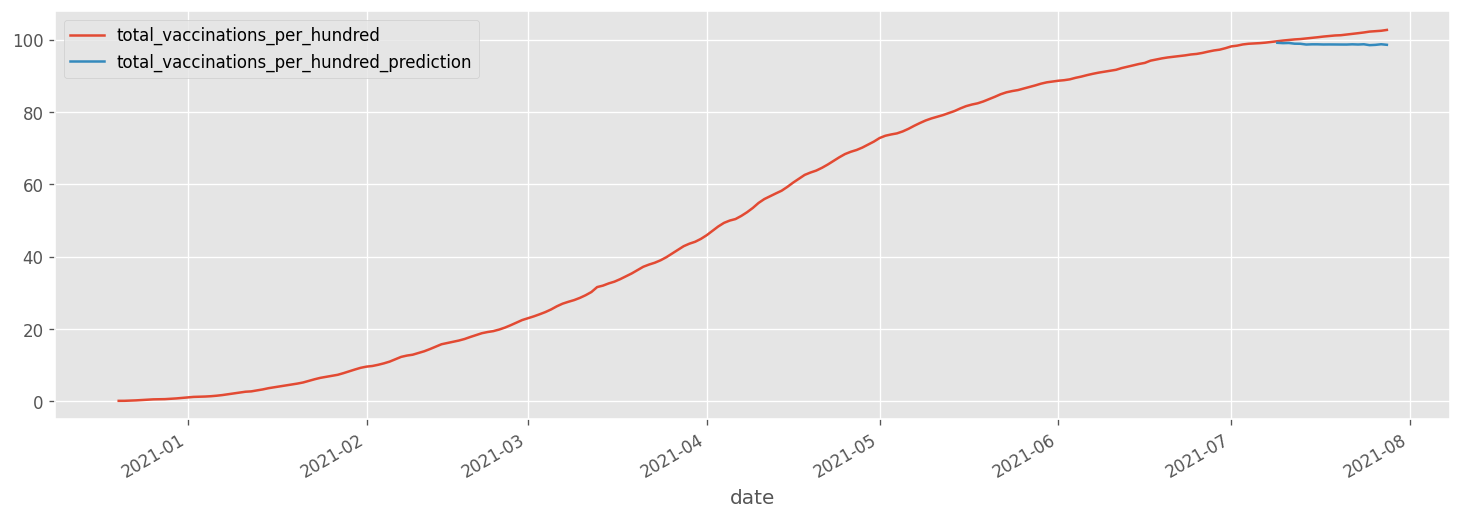

In [167]:
series_all[['total_vaccinations_per_hundred', 'total_vaccinations_per_hundred_prediction']].plot(figsize=(15,5))

In [168]:
predicted_results = xgb.predict(testX)
predicted_results
testY

date
2021-07-09     99.56
2021-07-10     99.74
2021-07-11     99.91
2021-07-12    100.05
2021-07-13    100.15
2021-07-14    100.31
2021-07-15    100.48
2021-07-16    100.65
2021-07-17    100.84
2021-07-18    100.99
2021-07-19    101.14
2021-07-20    101.21
2021-07-21    101.39
2021-07-22    101.59
2021-07-23    101.77
2021-07-24    101.97
2021-07-25    102.21
2021-07-26    102.32
2021-07-27    102.44
2021-07-28    102.67
Name: total_vaccinations_per_hundred, dtype: float64

In [169]:
timeseries_evaluation_metrics_func(testY, predicted_results)

MSE is : 6.6438889280656195
MAE is : 2.3450989074707023
RMSE is : 2.577574233279348
MAPE is : 2.3107515090153226
R2 is : -6.619534073374376



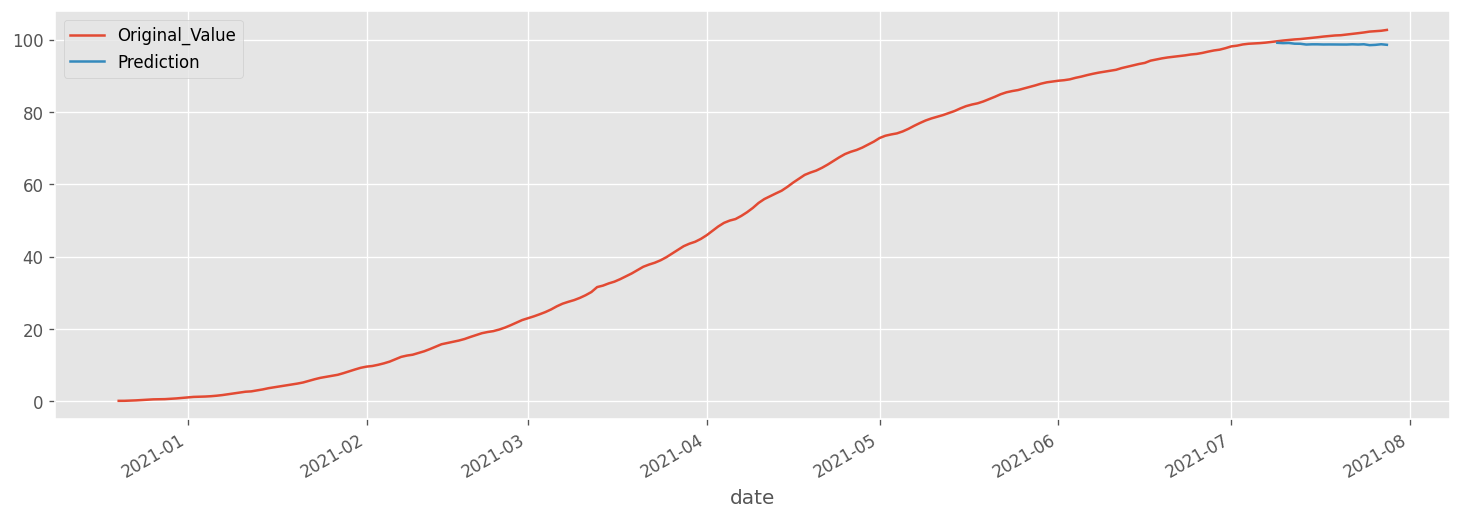

In [170]:
test_series['Prediction'] = predicted_results
series_all = pd.concat([test_series, train_series], sort=False)
series_all = series_all.rename(columns={'total_vaccinations_per_hundred':'Original_Value'})

Overview_Complete_Data_And_Prediction = series_all[['Original_Value','Prediction']].plot(figsize=(15, 5))

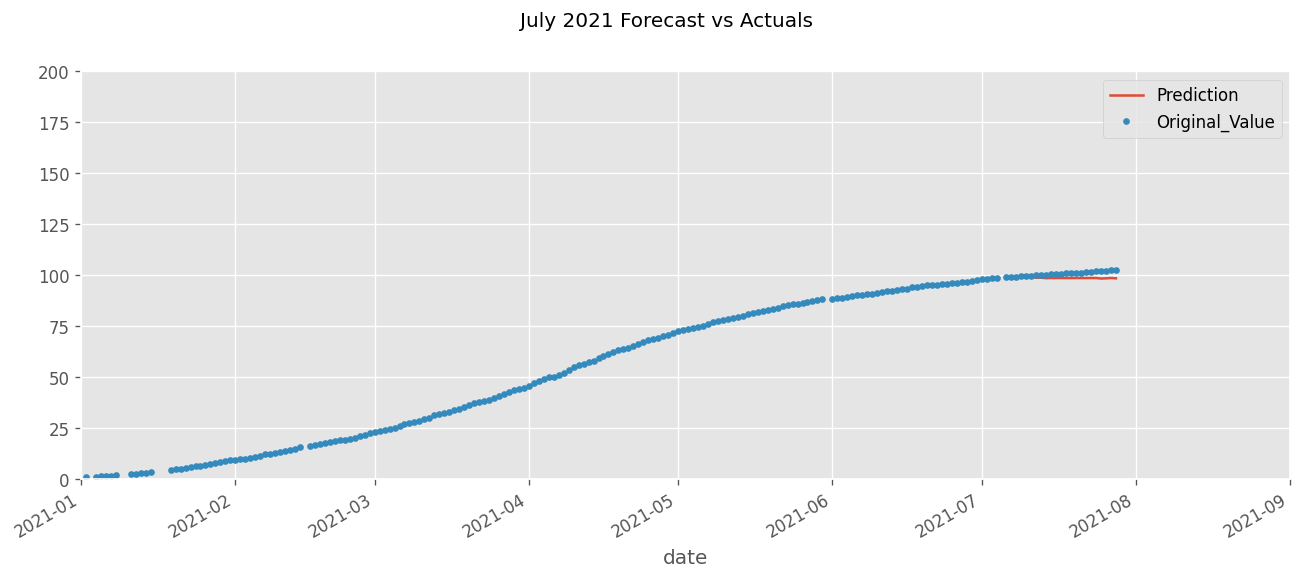

In [171]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(13)
Overview_Mai_2015 = series_all[['Prediction','Original_Value']].plot(ax=ax, style=['-','.'])
ax.set_xbound(lower='2021-01-01', upper='2021-09-01')
ax.set_ylim(0, 200)
plot = plt.suptitle('July 2021 Forecast vs Actuals')

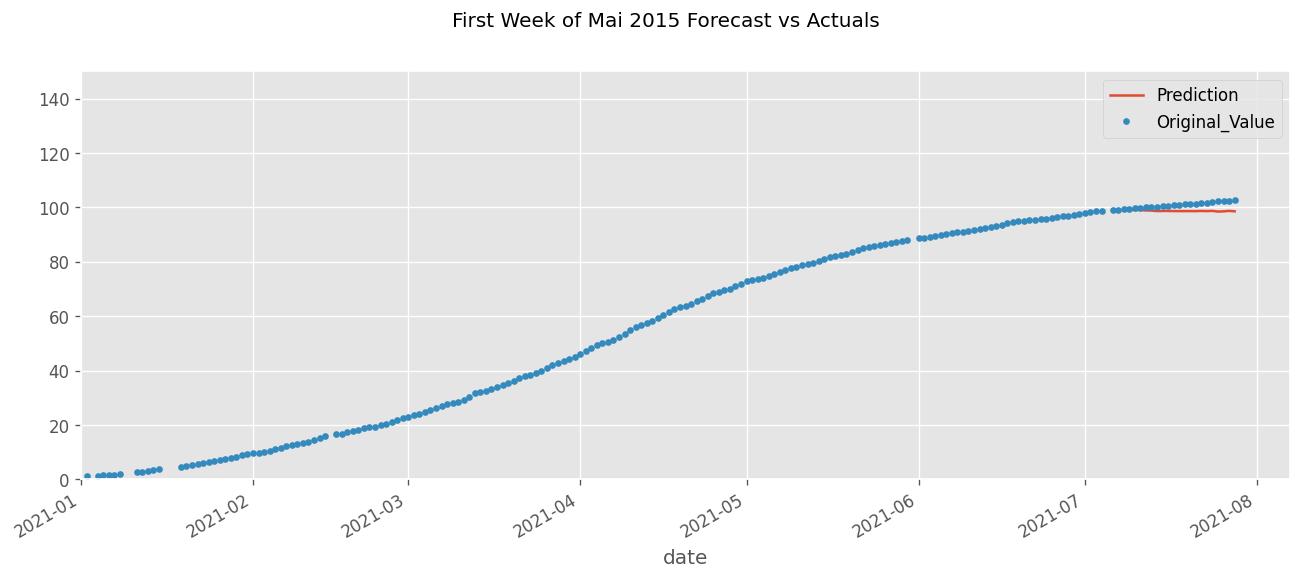

In [172]:
# Plot the forecast with the actuals for the first week of Mai
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(13)
Overview_Mai_2021 = series_all[['Prediction','Original_Value']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower='2021-01-01', upper='2021-08-07')
ax.set_ylim(0, 150)
plot = plt.suptitle('First Week of Mai 2015 Forecast vs Actuals')

In [173]:
##Error Metrics on test 
rmse = mean_squared_error(y_true=test_series['total_vaccinations_per_hundred'],
                   y_pred=test_series['Prediction'])
print('RMSE: %.3f' % rmse)

mae = mean_absolute_error(y_true=test_series['total_vaccinations_per_hundred'],
                   y_pred=test_series['Prediction'])
print('MAE: %.3f' % mae)

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape= mean_absolute_percentage_error(y_true=test_series['total_vaccinations_per_hundred'],
                   y_pred=test_series['Prediction'])
print('MAPE: %.3f' % mape)

RMSE: 6.644
MAE: 2.345
MAPE: 2.311


In [174]:
# Copy test_pjme
Worst_Best_Pred = test_series.copy()
Worst_Best_Pred = Worst_Best_Pred.reset_index()

# Generate error and absolut error values for the predictions made
Worst_Best_Pred['error'] = Worst_Best_Pred['total_vaccinations_per_hundred'] - Worst_Best_Pred['Prediction']
Worst_Best_Pred['abs_error'] = Worst_Best_Pred['error'].apply(np.abs)

# Extract Year, Month, Day of Month
Worst_Best_Pred['year'] = Worst_Best_Pred['date'].dt.year
Worst_Best_Pred['month'] = Worst_Best_Pred['date'].dt.month
Worst_Best_Pred['dayofmonth'] = Worst_Best_Pred['date'].dt.day

Worst_Best_Pred

date  total_vaccinations_per_hundred  ...  month  dayofmonth
0  2021-07-09                           99.56  ...      7           9
1  2021-07-10                           99.74  ...      7          10
2  2021-07-11                           99.91  ...      7          11
3  2021-07-12                          100.05  ...      7          12
4  2021-07-13                          100.15  ...      7          13
5  2021-07-14                          100.31  ...      7          14
6  2021-07-15                          100.48  ...      7          15
7  2021-07-16                          100.65  ...      7          16
8  2021-07-17                          100.84  ...      7          17
9  2021-07-18                          100.99  ...      7          18
10 2021-07-19                          101.14  ...      7          19
11 2021-07-20                          101.21  ...      7          20
12 2021-07-21                          101.39  ...      7          21
13 2021-07-22                          101.59  ...      7          22
14 2021-07-23                          101.77  ...      7          23
15 2021-07-24                          101.97  ...      7          24
16 2021-07-25                          102.21  ...      7          25
17 2021-07-26                          102.32  ...      7          26
18 2021-07-27                          102.44  ...      7          27
19 2021-07-28                          102.67  ...      7          28

[20 rows x 9 columns]

In [175]:
# Group error by days
error_by_day = Worst_Best_Pred.groupby(['year','month','dayofmonth']) \
    .mean()[['total_vaccinations_per_hundred','Prediction','error','abs_error']]

error_by_day

total_vaccinations_per_hundred  ...  abs_error
year month dayofmonth                                  ...           
2021 7     9                                    99.56  ...   0.447589
           10                                   99.74  ...   0.719355
           11                                   99.91  ...   0.845799
           12                                  100.05  ...   1.181363
           13                                  100.15  ...   1.303831
           14                                  100.31  ...   1.674784
           15                                  100.48  ...   1.784642
           16                                  100.65  ...   1.957327
           17                                  100.84  ...   2.191662
           18                                  100.99  ...   2.327799
           19                                  101.14  ...   2.502091
           20                                  101.21  ...   2.569573
           21                                  101.39  ...   2.759011
           22                                  101.59  ...   2.893581
           23                                  101.77  ...   3.128986
           24                                  101.97  ...   3.259131
           25                                  102.21  ...   3.744851
           26                                  102.32  ...   3.775978
           27                                  102.44  ...   3.726537
           28                                  102.67  ...   4.108087

[20 rows x 4 columns]

In [176]:
# Worst absolute predicted days
error_by_day.sort_values('abs_error', ascending=False).head(10)

total_vaccinations_per_hundred  ...  abs_error
year month dayofmonth                                  ...           
2021 7     28                                  102.67  ...   4.108087
           26                                  102.32  ...   3.775978
           25                                  102.21  ...   3.744851
           27                                  102.44  ...   3.726537
           24                                  101.97  ...   3.259131
           23                                  101.77  ...   3.128986
           22                                  101.59  ...   2.893581
           21                                  101.39  ...   2.759011
           20                                  101.21  ...   2.569573
           19                                  101.14  ...   2.502091

[10 rows x 4 columns]

In [177]:
# Best predicted days
error_by_day.sort_values('abs_error', ascending=True).head(10)

total_vaccinations_per_hundred  ...  abs_error
year month dayofmonth                                  ...           
2021 7     9                                    99.56  ...   0.447589
           10                                   99.74  ...   0.719355
           11                                   99.91  ...   0.845799
           12                                  100.05  ...   1.181363
           13                                  100.15  ...   1.303831
           14                                  100.31  ...   1.674784
           15                                  100.48  ...   1.784642
           16                                  100.65  ...   1.957327
           17                                  100.84  ...   2.191662
           18                                  100.99  ...   2.327799

[10 rows x 4 columns]

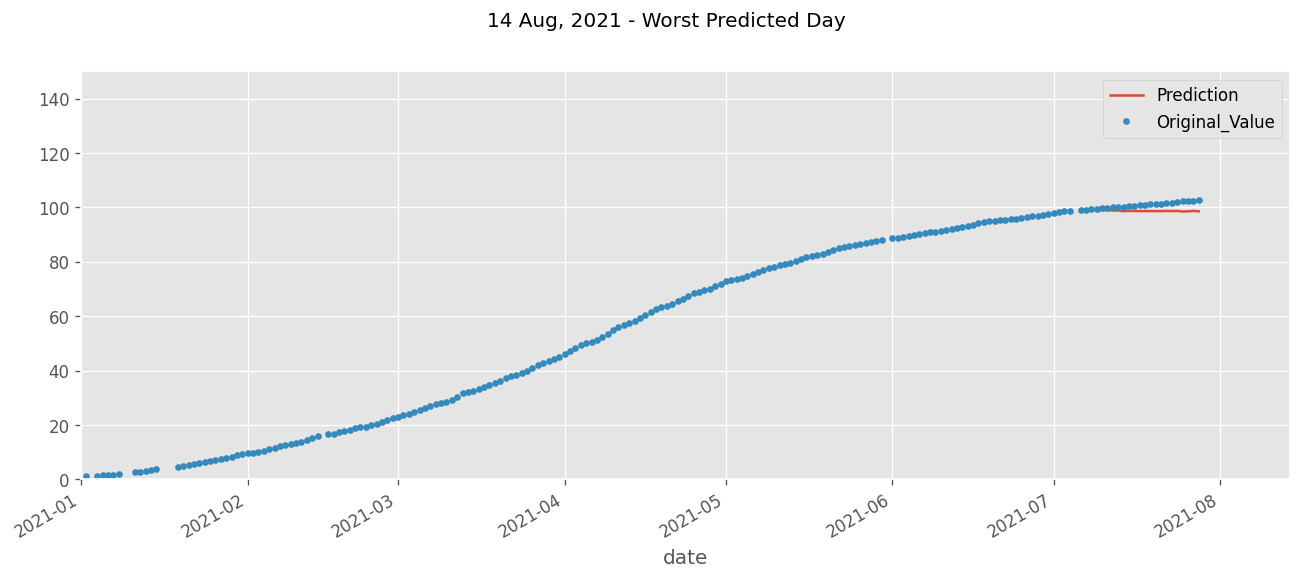

In [178]:
# Plot the forecast with the actuals 
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(13)
Overview_Mai_2015 = series_all[['Prediction','Original_Value']].plot(ax=ax, style=['-','.'])
ax.set_xbound(lower='2021-01-01', upper='2021-08-14')
ax.set_ylim(0, 150)
plot = plt.suptitle('14 Aug, 2021 - Worst Predicted Day')

### **LSTM FOR TIMESERIES**

In [195]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [196]:
#Import data 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
series = pd.read_csv(url, header=0, parse_dates=['date'],index_col=['date'])


#Filter by country
series = series.loc[series['location'] == 'United States']

#Drop irrelavent columns
series = series[['total_vaccinations_per_hundred']]

#Change datatype of date column to datetime
#series.date = pd.to_datetime(series.date)
#series.info()

#Replace NAN to 0
series_sorted = series.sort_values('total_vaccinations_per_hundred')
series = series_sorted.replace(np.nan,0)

#remove rows with zero values
series = series[(series.T != 0).any()]

#series.index = pd.DatetimeIndex(series.index).to_period('M')

series.head(10)

total_vaccinations_per_hundred
date                                      
2020-12-20                            0.17
2020-12-21                            0.18
2020-12-23                            0.30
2020-12-26                            0.58
2020-12-28                            0.64
2020-12-30                            0.84
2021-01-02                            1.26
2021-01-04                            1.36
2021-01-05                            1.45
2021-01-06                            1.59

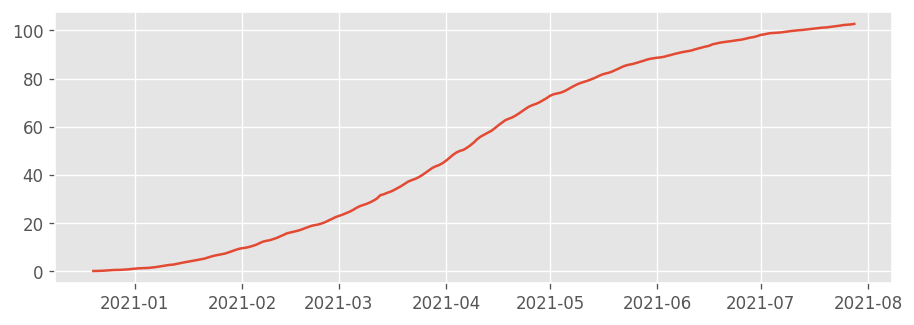

In [197]:
plt.plot(series)
plt.show()

In [198]:
# fix random seed for reproducibility
np.random.seed(7)

In [199]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(series)
dataset

array([[0.00000000e+00],
       [9.75609756e-05],
       [1.26829268e-03],
       [4.00000000e-03],
       [4.58536585e-03],
       [6.53658537e-03],
       [1.06341463e-02],
       [1.16097561e-02],
       [1.24878049e-02],
       [1.38536585e-02],
       [1.56097561e-02],
       [1.78536585e-02],
       [2.45853659e-02],
       [2.55609756e-02],
       [2.82926829e-02],
       [3.08292683e-02],
       [3.41463415e-02],
       [4.41951220e-02],
       [4.65365854e-02],
       [4.95609756e-02],
       [5.40487805e-02],
       [5.82439024e-02],
       [6.20487805e-02],
       [6.46829268e-02],
       [6.70243902e-02],
       [7.02439024e-02],
       [7.47317073e-02],
       [7.97073171e-02],
       [8.45853659e-02],
       [8.91707317e-02],
       [9.22926829e-02],
       [9.39512195e-02],
       [9.71707317e-02],
       [1.01073171e-01],
       [1.05756098e-01],
       [1.12195122e-01],
       [1.18536585e-01],
       [1.22048780e-01],
       [1.24390244e-01],
       [1.28975610e-01],


In [200]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

137 68


In [201]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [202]:
import numpy
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [203]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [204]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1500, batch_size=1, verbose=2)

Epoch 1/1500
135/135 - 2s - loss: 0.1413
Epoch 2/1500
135/135 - 0s - loss: 0.0808
Epoch 3/1500
135/135 - 0s - loss: 0.0548
Epoch 4/1500
135/135 - 0s - loss: 0.0444
Epoch 5/1500
135/135 - 0s - loss: 0.0378
Epoch 6/1500
135/135 - 0s - loss: 0.0311
Epoch 7/1500
135/135 - 0s - loss: 0.0223
Epoch 8/1500
135/135 - 0s - loss: 0.0135
Epoch 9/1500
135/135 - 0s - loss: 0.0064
Epoch 10/1500
135/135 - 0s - loss: 0.0023
Epoch 11/1500
135/135 - 0s - loss: 6.2450e-04
Epoch 12/1500
135/135 - 0s - loss: 1.5988e-04
Epoch 13/1500
135/135 - 0s - loss: 6.5961e-05
Epoch 14/1500
135/135 - 0s - loss: 4.9942e-05
Epoch 15/1500
135/135 - 0s - loss: 4.7523e-05
Epoch 16/1500
135/135 - 0s - loss: 4.6008e-05
Epoch 17/1500
135/135 - 0s - loss: 4.5297e-05
Epoch 18/1500
135/135 - 0s - loss: 4.4199e-05
Epoch 19/1500
135/135 - 0s - loss: 4.2578e-05
Epoch 20/1500
135/135 - 0s - loss: 4.1905e-05
Epoch 21/1500
135/135 - 0s - loss: 4.0995e-05
Epoch 22/1500
135/135 - 0s - loss: 4.0187e-05
Epoch 23/1500
135/135 - 0s - loss: 3.

In [205]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape= mean_absolute_percentage_error(y_true= testY[0],
                   y_pred=testPredict[:,0])
print('MAPE: %.3f' % mape)

mae = mean_absolute_error(y_true=testY[0],
                   y_pred=testPredict[:,0])
print('MAE: %.3f' % mae)

Train Score: 0.30 RMSE
Test Score: 0.43 RMSE
MAPE: 0.364
MAE: 0.356


In [206]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    #print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [207]:
timeseries_evaluation_metrics_func(testY[0], testPredict[:,0])

MSE is : 0.18347891348975695
MAE is : 0.35555118445194056
RMSE is : 0.4283443865510052
MAPE is : 0.3636315819267997
R2 is : 0.9935833601172737



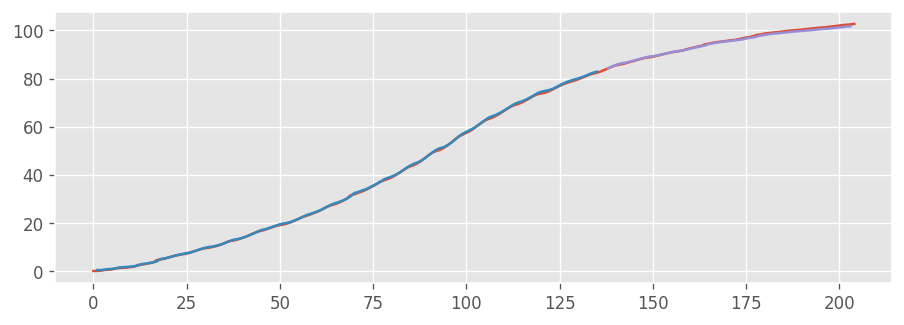

In [208]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()